# EDA To Prediction(DieTanic) - 필사

---
## 개요
* 1912년 4월 15일, 2224명 중 1502명의 목숨을 앗아간 타이타닉 참사의 탑승자 데이터를 분석한다.
* 탐승자 데이터로 모델을 학습시켜 생존률을 예측한다.

---
## 목차
* **EDA(선택적 데이터 분석)**
    1. 컬럼 별 특징 분석
    2. 여러 특성을 고려한 관계나 경향 탐구

    <br>
    <br>
* **데이터 전처리**
    1. 필요한 피처 추가
    2. 불필요한 피처 제거
    3. 데이터를 모델링에 적합한 형태로 변환

    <br>
    <br>
* **모델 학습 및 예측**
    1. 기본 알고리즘 실행
    2. 교차 검증
    3. 앙상블
    4. 중요 피처 추출

    <br>
    <br>
    


---
### EDA(선택적 데이터 분석)
데이터를 가공하고, 모델을 학습시키는 것보다 더 중요한 것이 EDA이다. 학습을 진행하기 전에 내가 가지고 놀아야할 데이터가 무엇인지, 어떤 정보를 가지고 있는지 파악해야 한다.  
또한, 각 컬럼 별로 어떤 연관이 있고, 그 것이 결과에 어떤 영향이 있을지 분석을 하는 것도 중요하다. EDA를 통해 각 컬럼의 특징을 파악하고 컬럼들 사이의 관계나 데이터로 알 수 있는 경향을 파악해보도록 한다.

In [1]:
# EDA 작업에 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 학습 데이터 불러오기
data = pd.read_csv('train.csv')

In [3]:
# 학습 데이터 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 각 컬럼 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 각 컬럼 정보

1. PassengerId(int): 탑승객 ID 
2. Survived(int): 생존여부(0: 사망, 1: 생존)
3. Pclass(int): 티켓 등급 (1: 1등급, 2: 2등급, 3: 3등급)
4. Name(object): 승객명
5. Sex(object): 성별
6. Age(float): 나이
7. Sibsp(int): 동승 형제/배우자 수
8. Parch(int): 동승 부모/자녀 수
9. Ticket(object): 티켓 번호
10. Fare(float): 승객 요금
11. Cabin(object): 객실 번호
12. Embarked(object): 기항지 위치 (C: Cherbourg, Q: Queenstown, S: Southampton)

In [5]:
# 컬럼 별 결측치 개수 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결측 데이터 확인
* Age: 177명의 나이가 미상인 것을 알 수 있다. 평균 나이로 채워야 할까?
* Cabin: 687개명의 객실 번호가 미상인 것을 알 수 있다. 적지 않은 크기라 지우긴 부담스럽고, unknown으로 채워야 할까?
* Embarked: 2명의 기항지가 미상인 것을 알 수 있다. 전체 데이터 중 2명이므로 이 로우는 제거해도 괜찮을 것 같다.

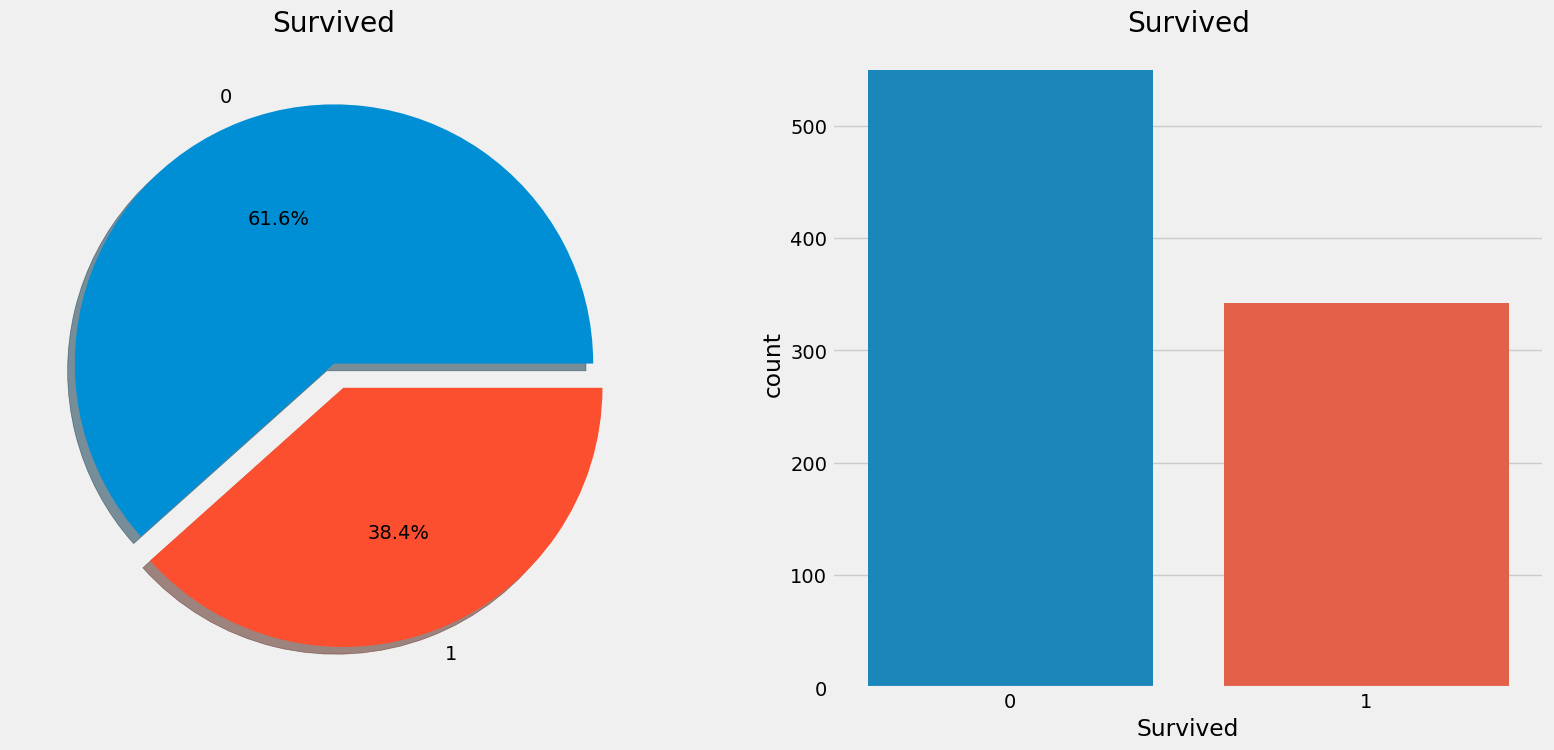

In [6]:
# 생존자와 사망자 비율 그래프로 그리기
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#### 전체 데이터 대비 생존비율 확인
* 전체 데이터 중 약 1/3만 생존한 것을 확인할 수 있다.
* 어떤 데이터 범주에 속한 사람들이 살아남았는지 탐구해볼 필요성이 있다.

#### 1. 컬럼 별 특징 분석

**탑승 등급 -> 차례형 피처**

In [7]:
# 탑승 등급 별 생존 여부 데이터 개수 확인
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


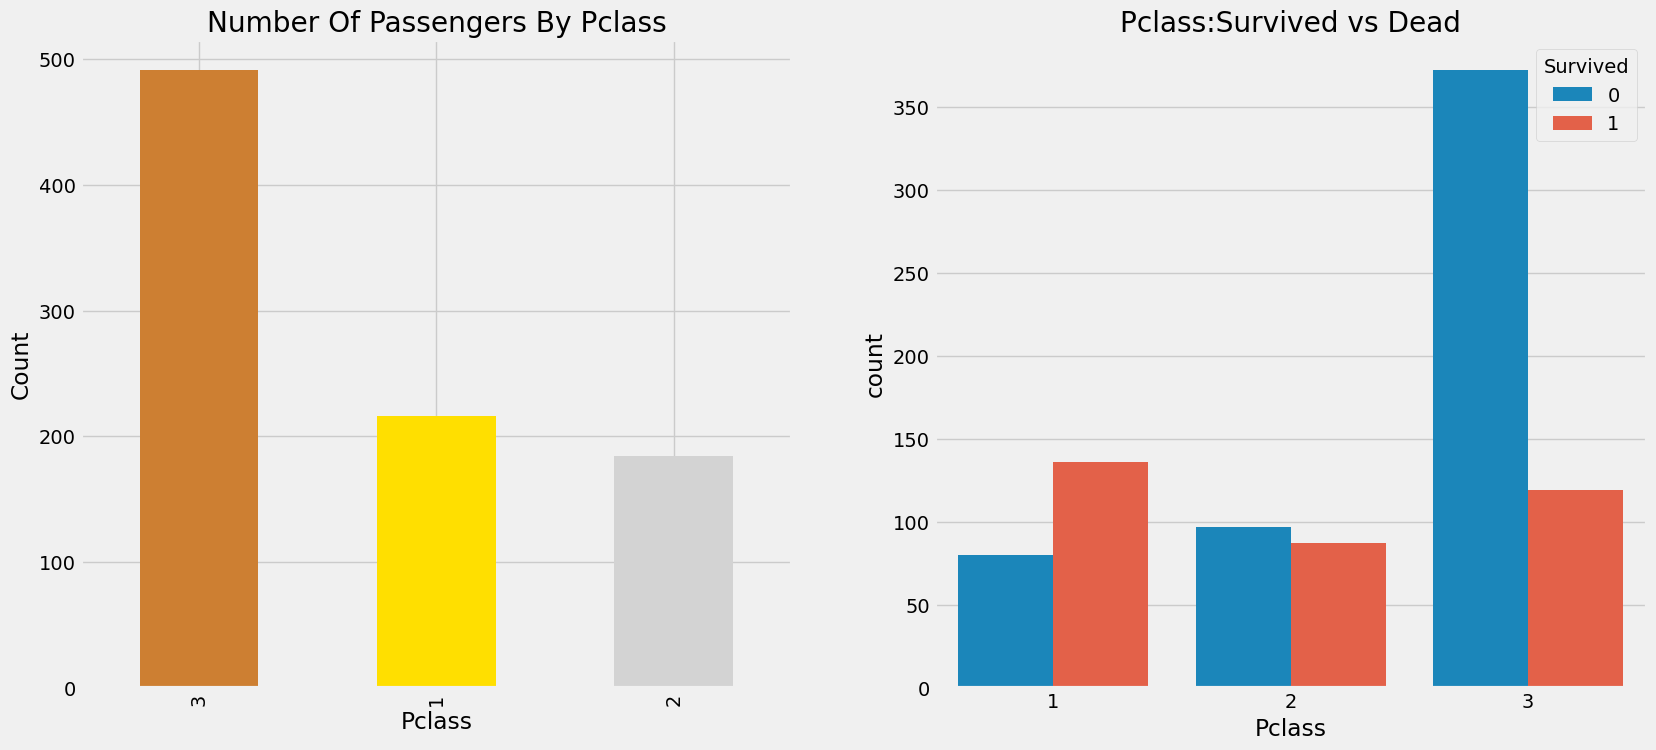

In [8]:
# 탑승 등급 별 탑승객 수 그래프와 탑승 등급 별 생존 여부 그래프 그리기
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

* 3급 승객의 수가 1급 승객의 수보다 약 2.5배 이상 많음에도 불구하고 1급 승객의 생존율이 더 높은 것을 알 수 있다.
* 위 그래프로 미루어 보아 구조 현장에서 탑승 등급으로 구조 우선순위가 정해졌음을 의심해볼 수 있다.

In [9]:
# 성별을 포함한 생존 여부 데이터 개수 확인
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

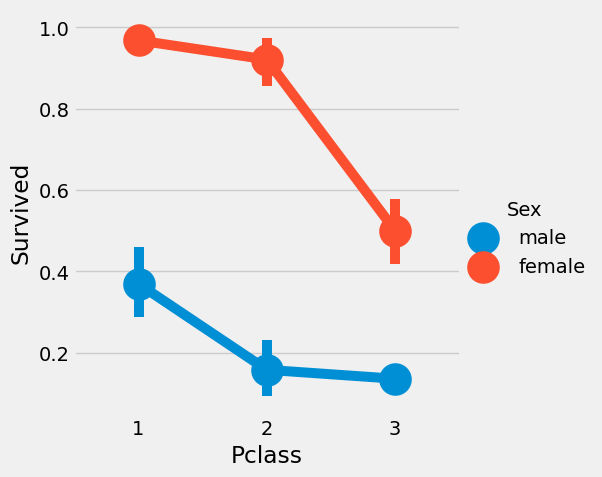

In [10]:
# 탑승 등급 별 생존 확율을 성을 분리하여 그래프 그리기
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=data)
plt.show()

* 1등급 여성 사망자는 94명 중 3명으로 약 95%~96%임을 알 수 있다.
* 이로써 탑승 등급과 상관없이 여성을 우선적으로 구조를 진행했다고 판단 할 수 있다.
* 성별에 따른 생존율을 더 확인해봐야겠다.

**성별 -> 범주형 피처**

In [11]:
# 성별 별 생존 여부 데이터 확인
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

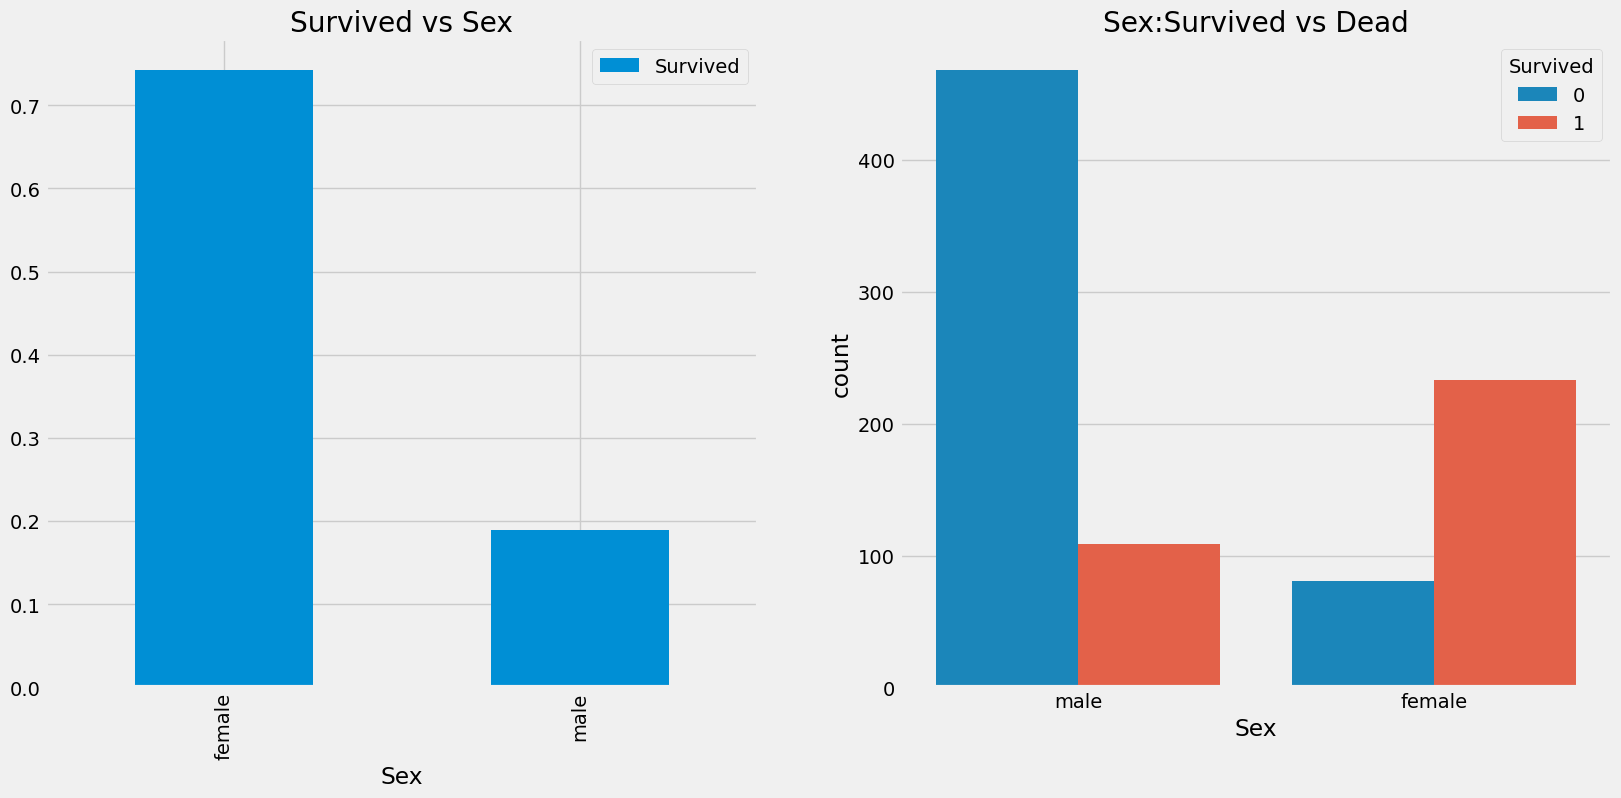

In [12]:
# 성별 별 생존 비율과 생존 여부 데이터 그래프 그리기
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

* 남성의 생존율에 반해 여성의 생존율이 약 3.5배 더 높은 것을 알 수 있다.
* 남성의 경우 사망자가 생존자의 약 4배가 넘는 반면에, 여성의 사망자는 생존자의 약 1/3 정도로 낮다.
* 여성과 아이와 노인을 먼저 대피시킨 것일까? 나이 데이터도 한 번 확인해봐야겠다.

**나이 -> 연속형 피처**

In [13]:
# 최고령, 최저령, 평균 나이 확인
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


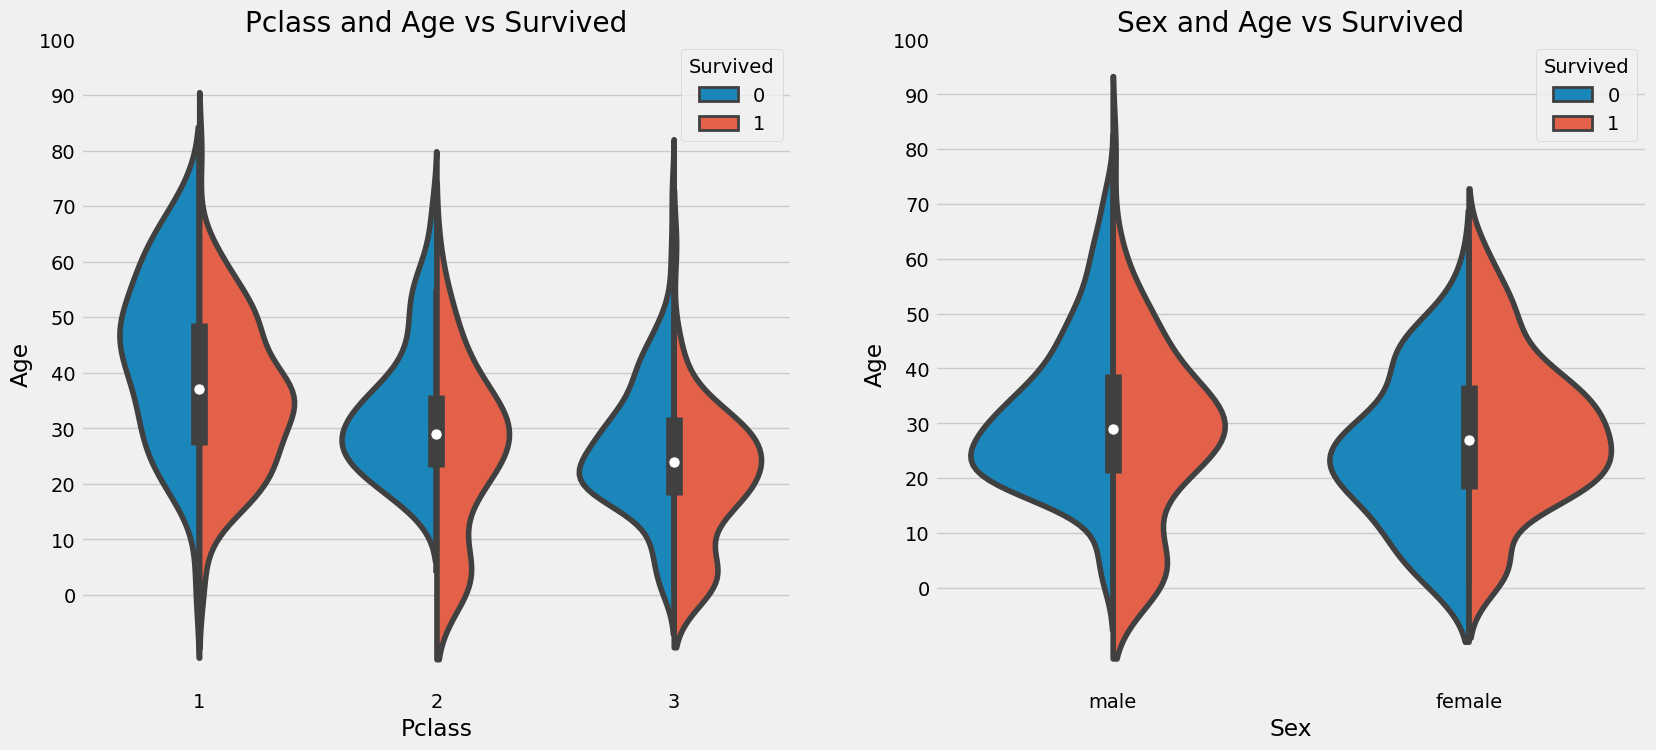

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# 탑승 등급 별 나이대에 대한 생존률 그래프 그리기
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
# 연렬 별 나이대에 대한 생존률 그래프 그리기
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 어린이의 수는 탑승 등급이 낮을수록 증가하고 생존율은 등급에 상관없이 양호한 것으로 판단된다.
* 20대~50대의 생존률은 높은 편이며, 여성의 경우 더 높은 수치임을 알 수 있다.
* 남성의 경우, 나이가 증가함에 따라 생존률이 줄어드는 것을 확인할 수 있다.
* 나이 데이터에는 177개의 결측치가 존재하고 이러한 NaN 값들은 전체 나이의 평균으로 지정할 수 있지만, 9살 아이 데이터에 29살이라는 평균 나이를 대입하는 것은 올바르지 않다.
* 이럴 경우에는 나이를 짐작할 수 있는 피처가 있는지 찾아본다.

In [15]:
# 이름 데이터에서의 이니셜 추출을 위한 정규식 생성
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
# 이니셜이 포함하는 성별 데이터 확인
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
# 철자가 틀리거나 특정 성별을 의미하는 값 대체
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
# 각 이니셜 별 평균 나이 확인
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
# 추출한 각 이니셜 별 평균 나이를 나이대에 해당하는 결측값에 대입
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
# 결측치 존재 여부 확인
data.Age.isnull().any()

False

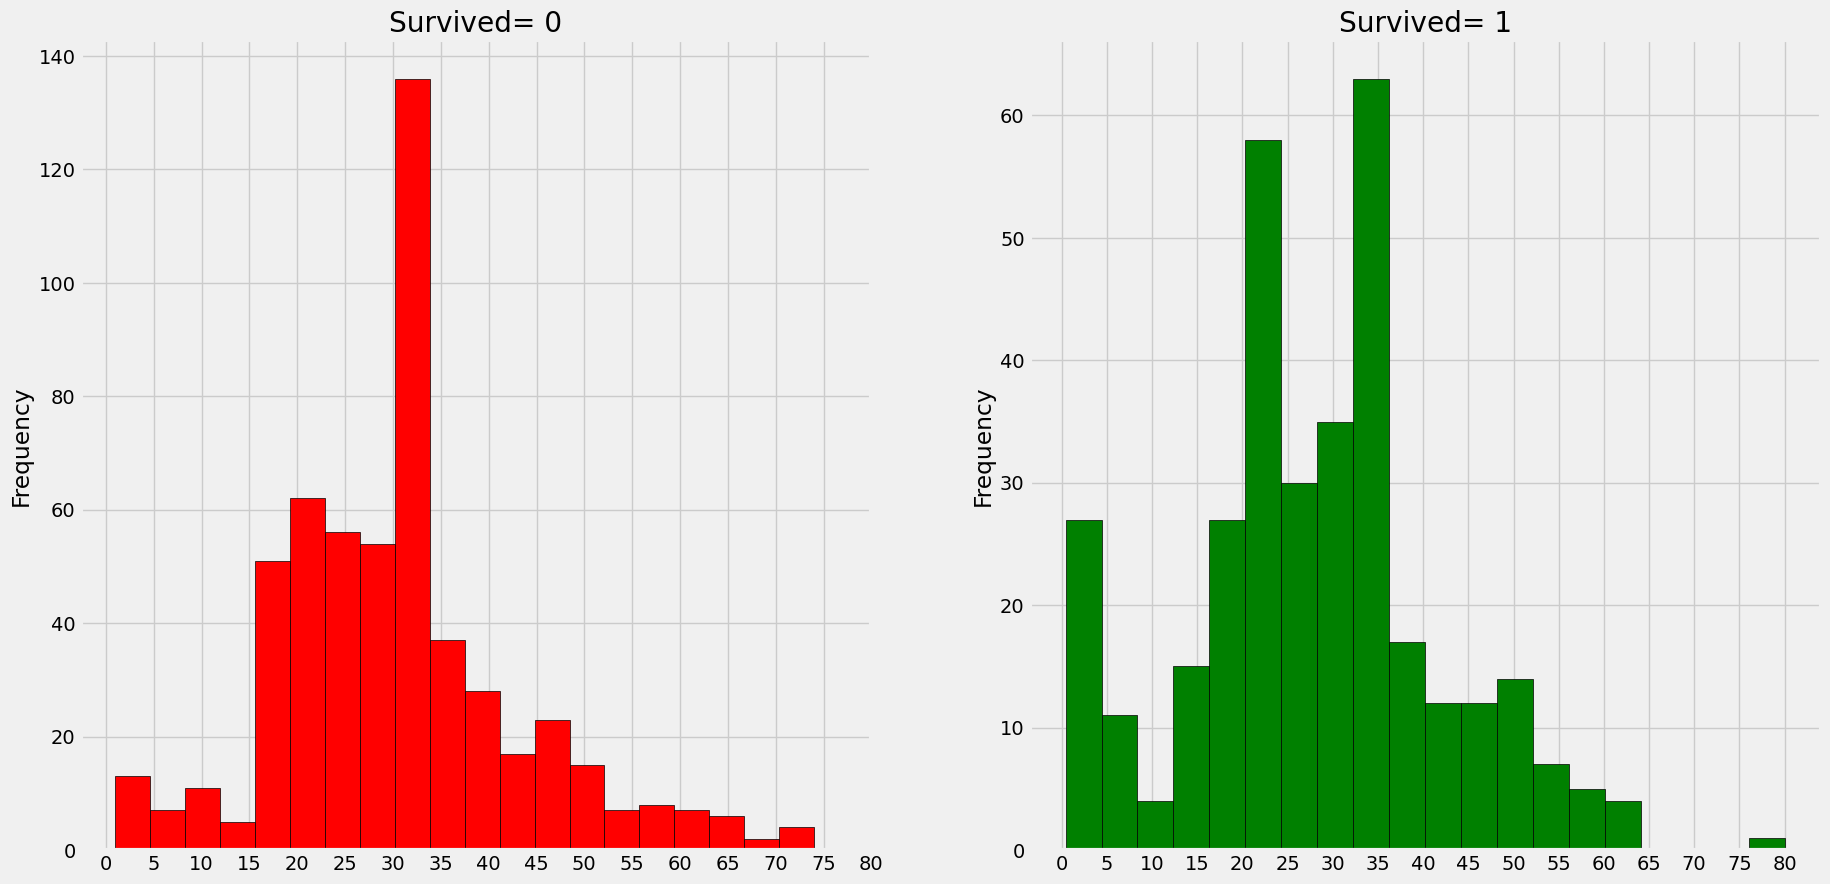

In [21]:
# 나이대 별 생존 여부 분포표 그리기
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* 유아들은 대거 구조되었음을 알 수 있다.
* 가장 나이가 많은 승객은 구조가 되었음을 알 수 있다.
* 사망자는 30~40대가 가장 많음을 알 수 있다.

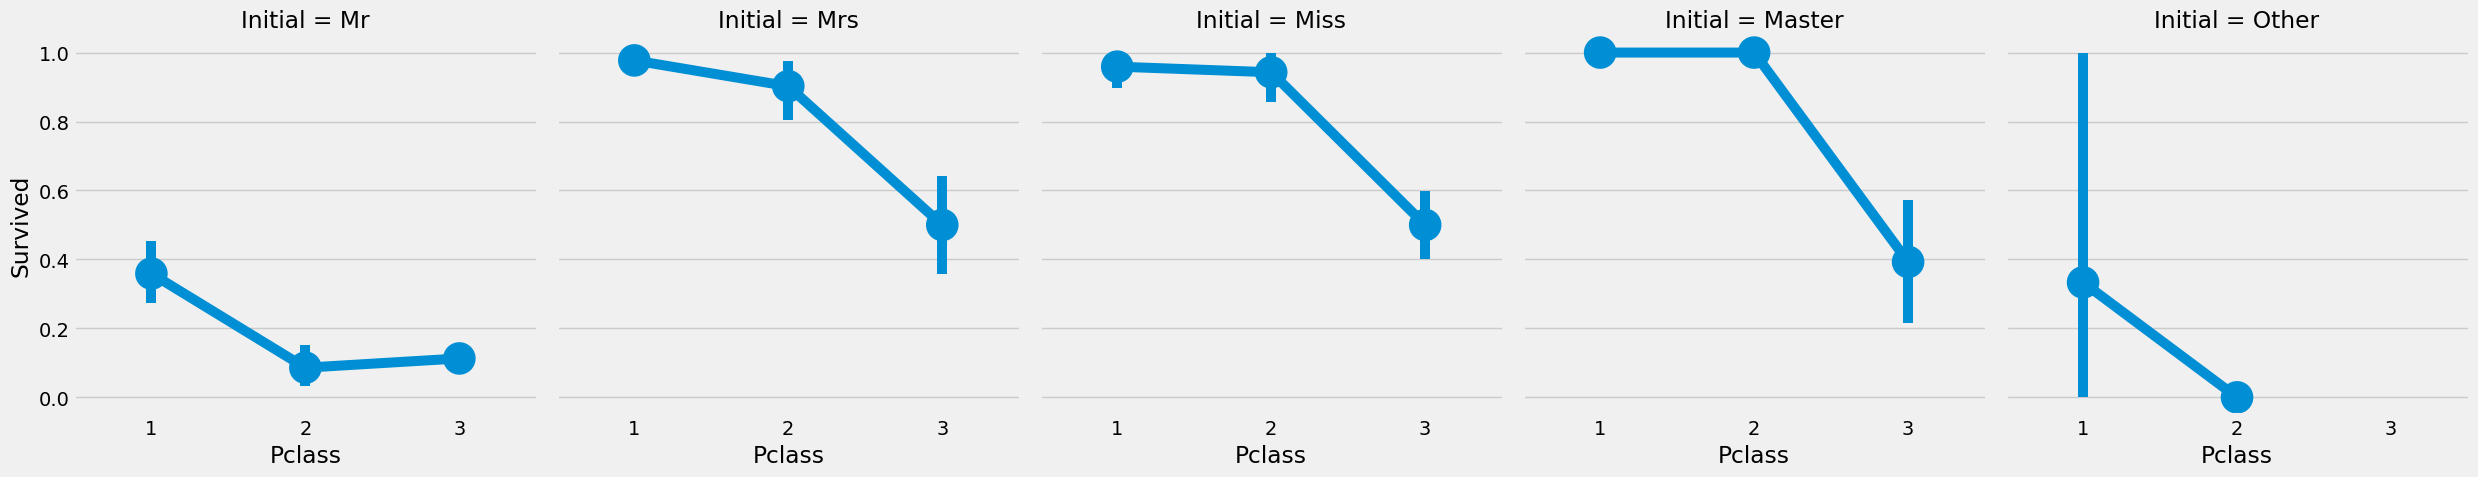

In [22]:
sns.catplot(x='Pclass',y='Survived',col='Initial',kind='point',data=data)
plt.show()

* 이로써 초기 추측과 동일하게 아이와 노인과 여성을 우선적으로 구조했음을 알 수 있다.

**기항지 위치 -> 범주형 피처**

In [23]:
# 기항지와 탑승 등급 대비 성별 별 생존율 확인 
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

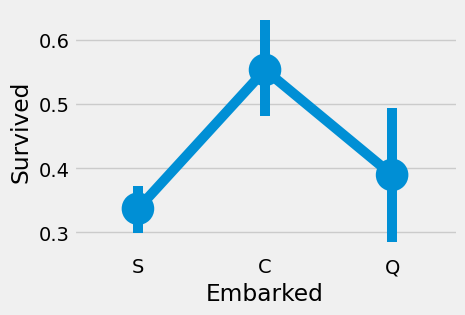

In [24]:
# 기항지 별 생존 가능성 확인
sns.catplot(x='Embarked',y='Survived',kind='point',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

* 기항지 별 생존 가능성은 Cherbourg가 약 0.55로 가장 높은 반면에 Southampton가 약 0.34로 가장 낮은 것을 알 수 있다.

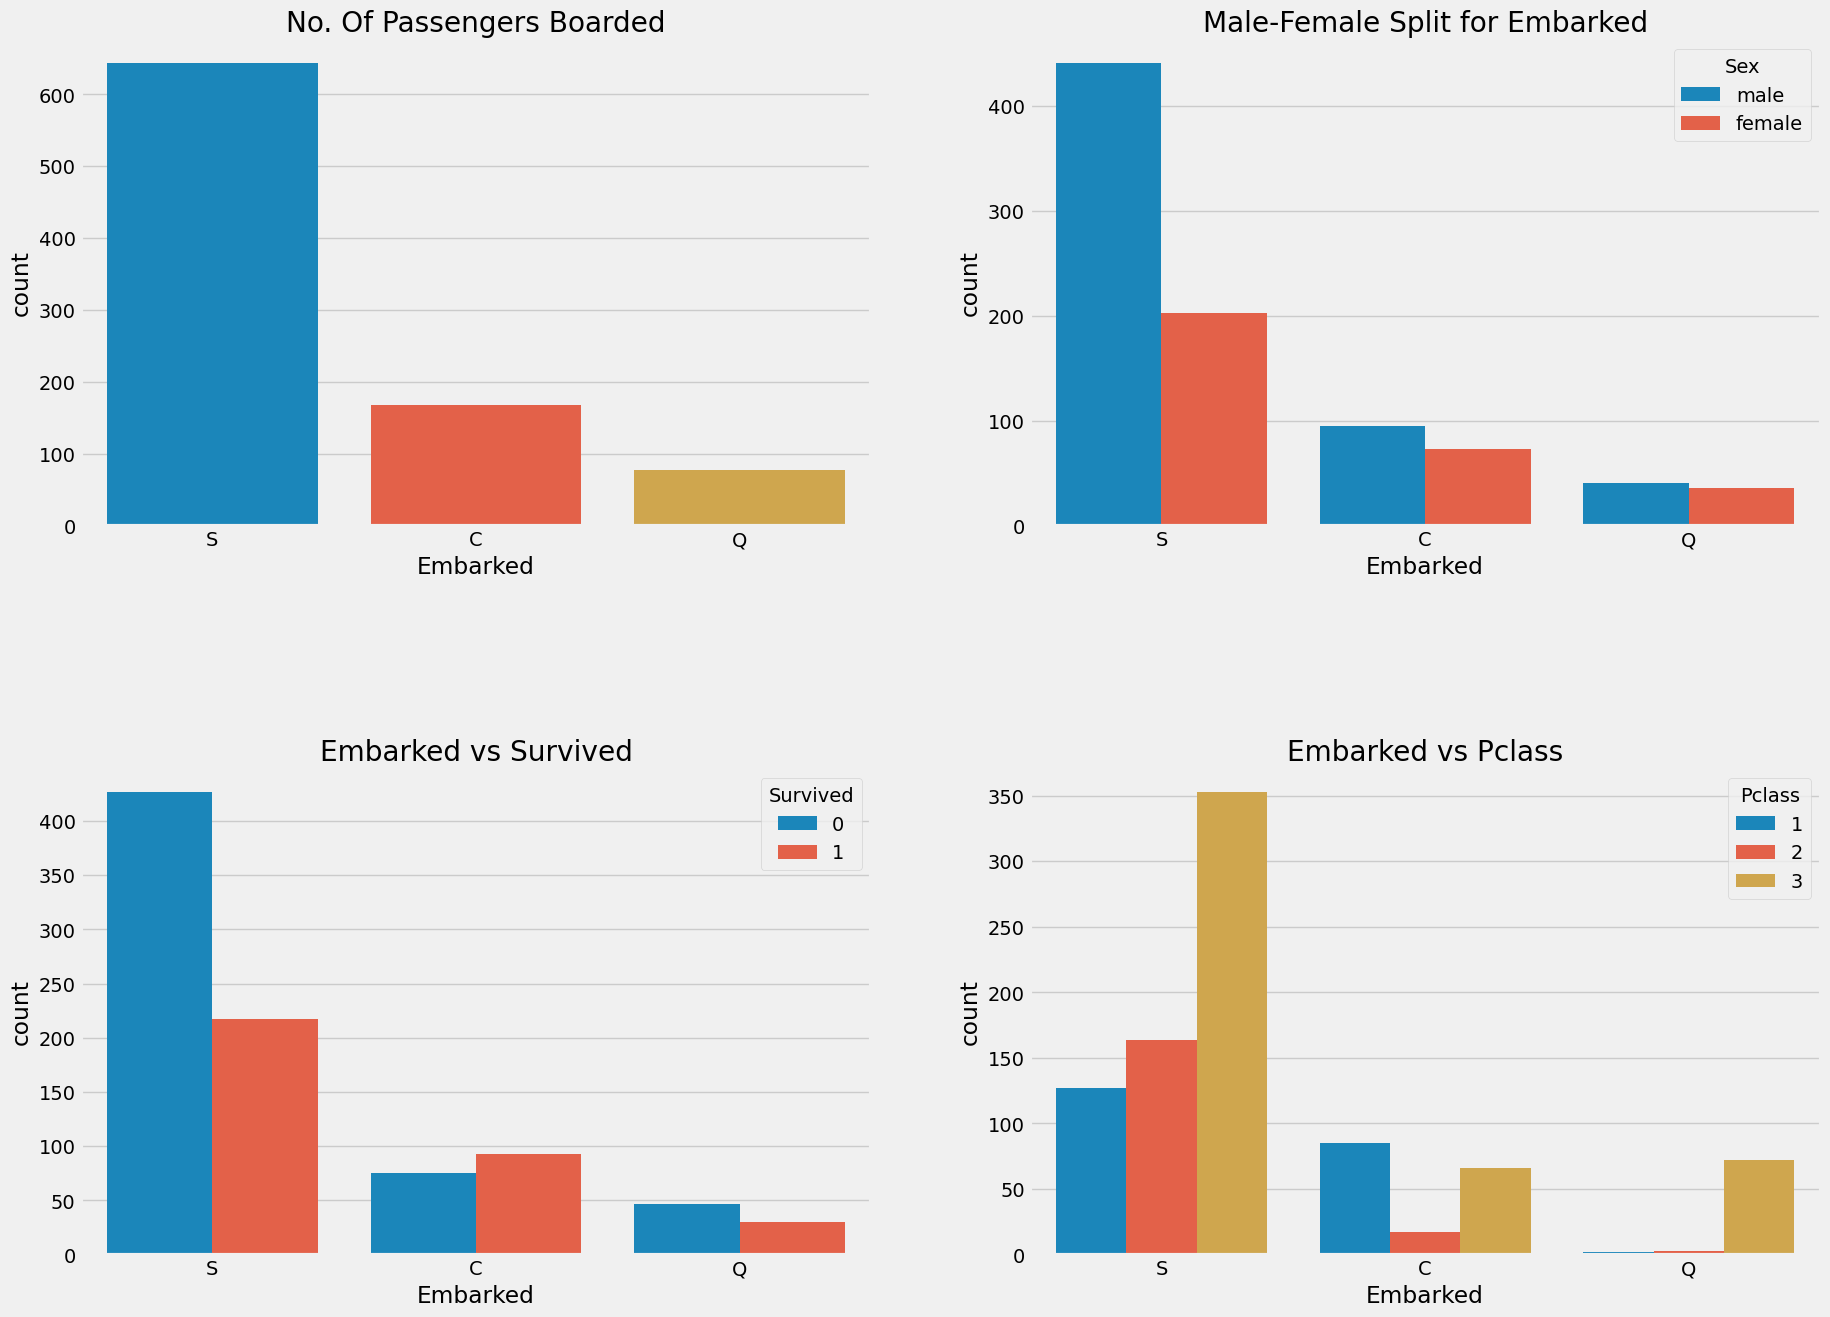

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
# 기항지 별 탑승객 수 그래프 그리기
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
# 기항지 별 남여 성비 그래프 그리기
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
# 기항지 별 생존 여부 그래프 그리기
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
# 기항지 별 탑승 등급 수 그래프 그리기
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* Southampton에서 탑승한 승객들은 대부분 3등급임을 알 수 있다.
* cherbourg에서 탑승한 승객들은 상당한 비율이 생존을 했기 때문에 운이 좋다고 볼 수 있다. 생존자 수로만 봤을 때 1등급과 2등급 승객을 모두 구조한 것일 수 있기 때문이다.
* Southampton에서 대다수의 부자 승객이 탑승한 것으로 예상되며, 이 지역 탑승객들은 생존 가능성이 낮다. 약 80%의 3등급 승객들이 사망했기 때문이다.
* Queenstown에서 탑승한 약 95%의 승객은 3등급이었음을 알 수 있다.

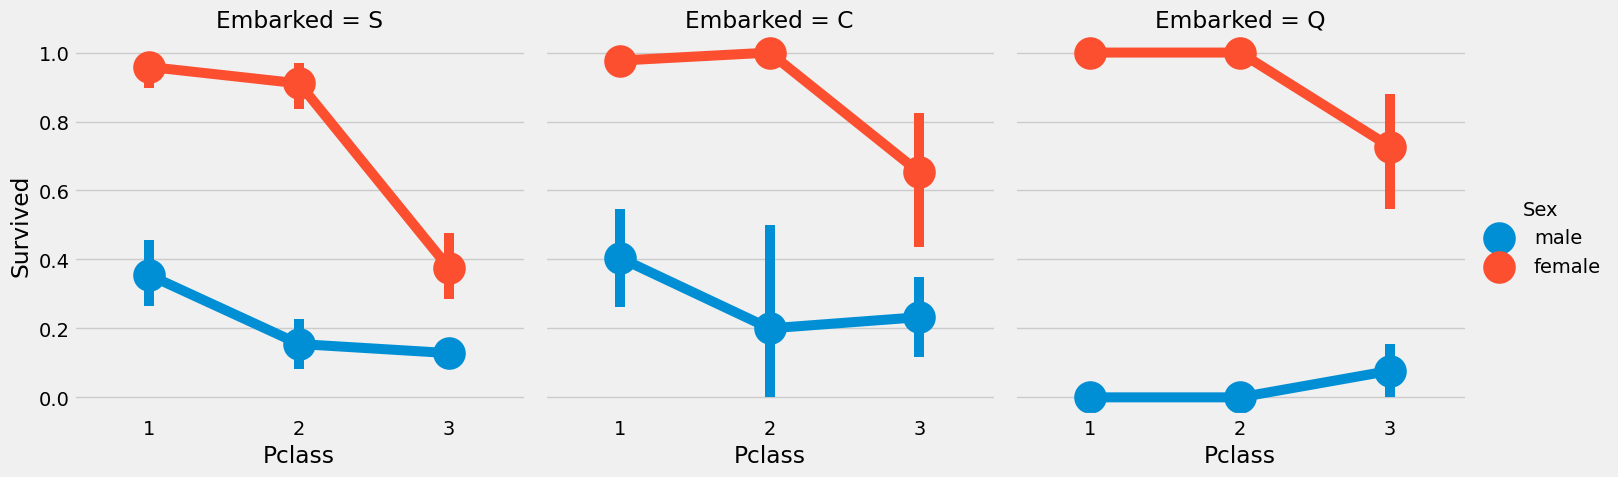

In [26]:
# 기항지 별 등급에 따른 생존율 그래프 그리기
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',kind='point',data=data)
plt.show()

* 1등급 여성과 2등급 여성은 등급에 관계없이 높은 생존율을 보인다는 것을 알 수 있다.
* Southampton에서 탑승한 3등급 승객은 남녀 모두 생존율이 낮기 때문에 운이 안좋다는 것을 알 수 있다.
* Queenstown에서 탑승한 승객은 거의 대부분이 3등급이기 때문에 남성에게 가장 운이 안좋았다는 것을 알 수 있다.

In [27]:
# 기항지 데이터의 결측치를 가장 많은 승객이 탑승한 Southapmton으로 채우기
data['Embarked'].fillna('S',inplace=True)
# 기항지 데이터의 결측치 존재 여부 확인
data.Embarked.isnull().any()

False

#### 동승 형제/배우자 수 -> 이산형 피처
이 피처는 특정 탑승객이 혼자 탑승을 했는지, 형제나 배우자와 탑승했는지를 보여준다.
* Sibling: brother, sister, stepbrother, stepsister
* Spouse: husband, wife

In [28]:
# 동승 형제/배우자 수 별 생존 여부 확인
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


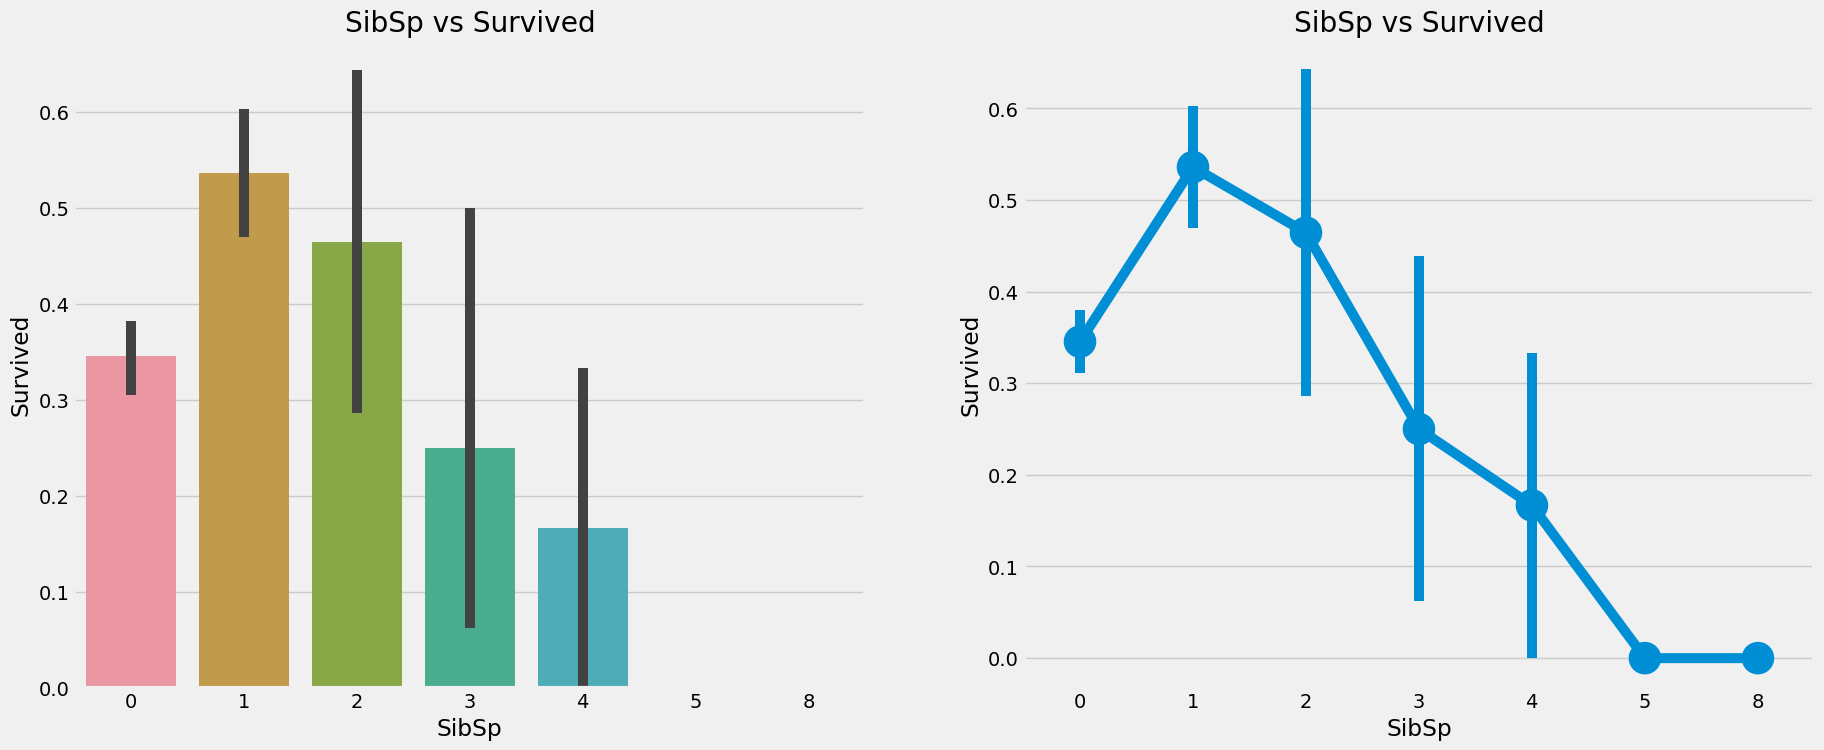

In [29]:
# 동승 형제/배우자 수 별 생존 여부 그래프 그리기
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
# 동승 형제/배우자 수 별 탑승 등급 확인
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* 막대 그래프와 포인트 그래프는 승객이 형제/배우자 없이 혼자 탑승할 경우 생존율이 약 34.5%임을 보여준다.
* 형제/배우자의 수가 증가하면 그래프가 대략적으로 감소하는 것을 알 수 있는데, 이는 당연스럽게 내 가족을 먼저 구하려고 하기 때문에 나타난 수치일 것이다.
* 5~8명으로 이루어진 가족의 생존율은 0이다.
* crosstab을 보면 형제/배우자 수가 4명 이상인 탑승객은 모두 3등급임을 알 수 있는데, 이는 3등급 탑승객 중 5~8명의 가족은 전부 사망했다는 것을 알 수 있다.

#### Parch

In [31]:
# 탑승 등급 별 동승 부모/자녀 수 확인
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


* 위의 crosstab에서 또한 구성원이 많은 가족은 모두 3등급 탑승객임을 알 수 있다.

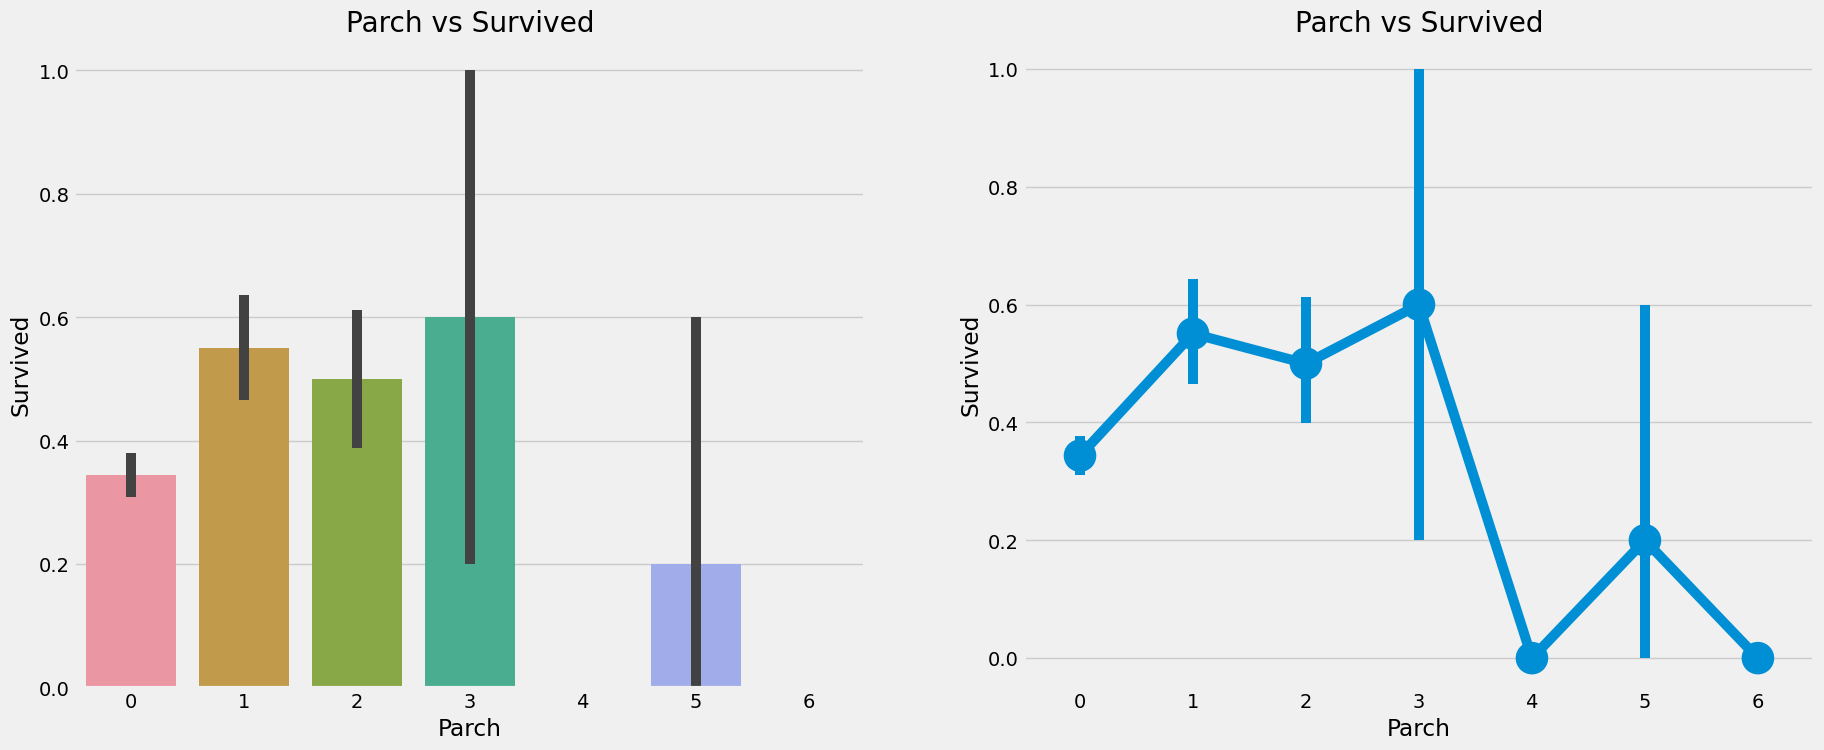

In [32]:
# 동승 부모/자녀 수 별 생존율 그래프 그리기
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

* 부모/자녀를 동반한 승객들은 생존 가능성이 더 높지만, 그 수가 증가할수록 생존율은 낮아진다.
* 부모/자녀가 1~3명인 탑승객의 생존율이 가장 높고, 그 수가 4명 이상일 때에는 생존 가능성에 치명적인 것을 확인할 수 있다.

#### 탑승 요금 -> 연속적 피처

In [33]:
# 최고가, 최저가, 탑승 요금 평균 확인
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


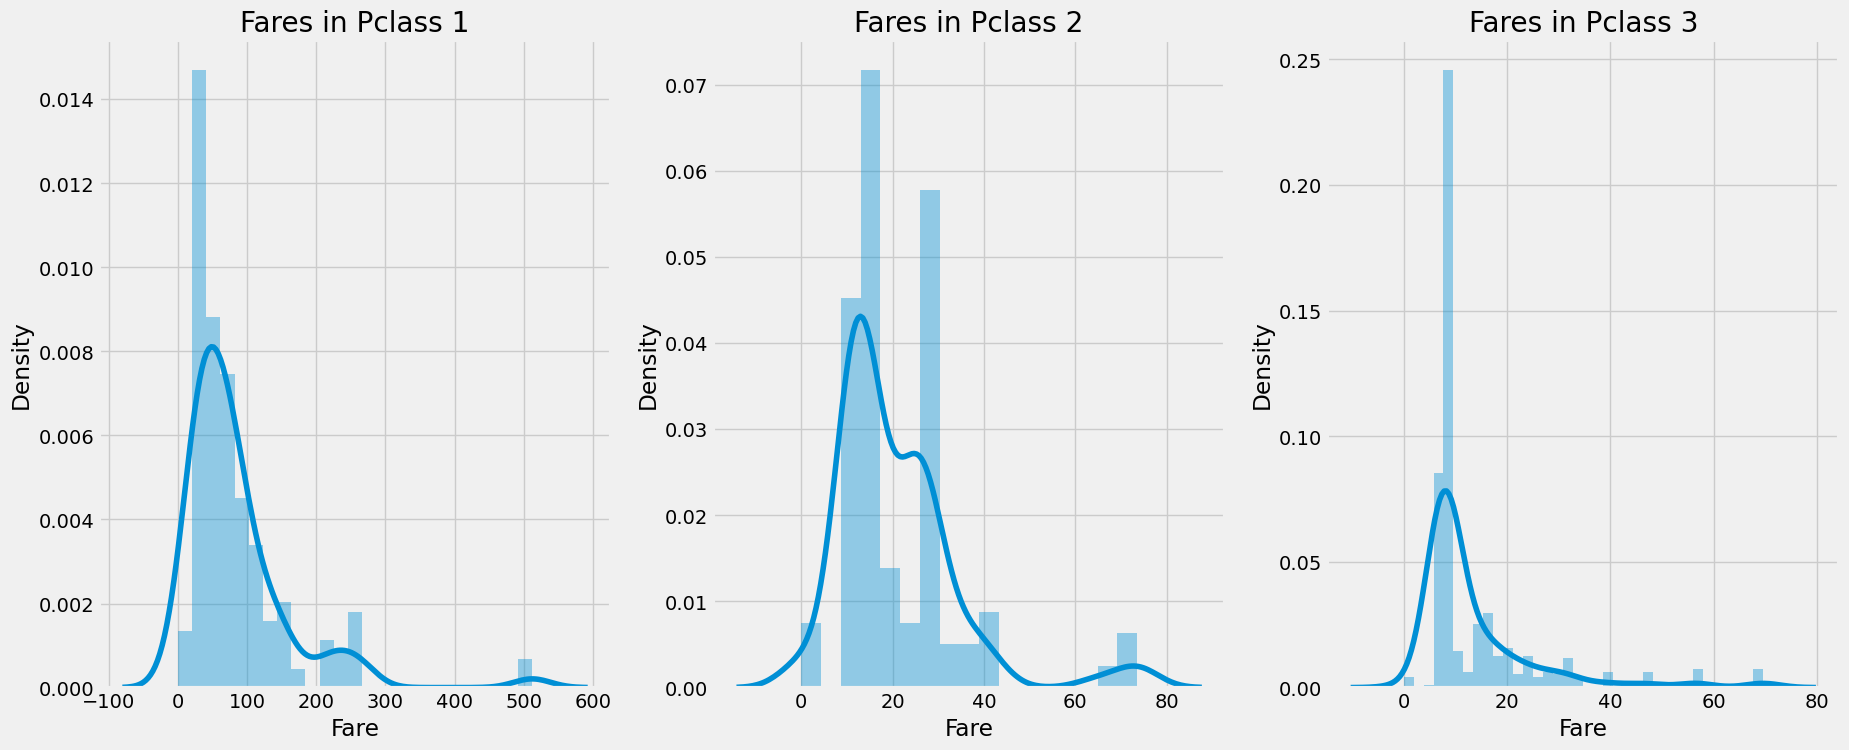

In [34]:
# 등급 별 가격 그래프 그리기
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* 1등급의 탑승 요금에 큰 분포가 있는 것으로 보이며, 이 분포는 표준이 감소함에 따라 계속 감소하는 것을 알 수 있다.
* 이 것 또한 연속적이므로, 비닝을 통하여 이산값으로 변환할 수 있다.

#### EDA 과정을 통한 데이터 분석 결과
1. 성별: 남성에 비해 여성의 생존 가능성이 높다.
2. 티켓 등급:
    - 1등급 승객의 생존율이 높아지는 경향이 있다.
    - 3등급 승객의 생존율이 매우 낮다.
    - 여성의 경우, 1등급의 생존율은 거의 1이고, 2등급의 생존율도 비교적 높다.
3. 나이: 
    - 5세에서 10세 미만의 어린이들은 생존 가능성이 높다.
    - 15세에서 35세 사이의 승객이 많이 사망하였다.
4. 기항지:
    - 대부분의 1등급 승객들이 Southampton에서 탑승했음에도, Cherbourg에서 탑승한 승객들의 생존율이 더 높다.
    - Queenstown에서 탑승한 승객들은 거의 대부분 3등급이다.
5. 부모/자녀 혹은 형제/배우자 동승 명 수: 1-2명의 형제/배우자가 있거나, 1-3명의 부모/자녀 동승객은 혼자 혹은 대가족이 함께 탑승한 케이스보다 생존율이 높다.


#### 피처들 간의 상관 관계
* 피처 간의 상관관계를 파악할 때 사용하는 함수
    * sns.heatmap(): Seaborn에서 히트맵을 그리는 함수
    * data.corr(): 데이터프레임의 상관관계 행렬을 계산
    * annot=True: 각 셀에 숫자를 표시할지 여부를 지정하는 매개변수
    * cmap='RdYlGn': 사용할 색상 맵을 지정하는 매개변수. 'RdYlGn'은 빨강, 노랑, 초록 색상으로 구성된 컬러맵
    * linewidths=0.2: 셀 간의 경계선의 너비를 지정하는 매개변수
    * fig=plt.gcf(): 현재 그림(figure) 객체를 가져오는 함수
    * fig.set_size_inches(10, 8): 그림 크기를 지정하는 함수로, 여기서는 가로 10인치, 세로 8인치로 설정

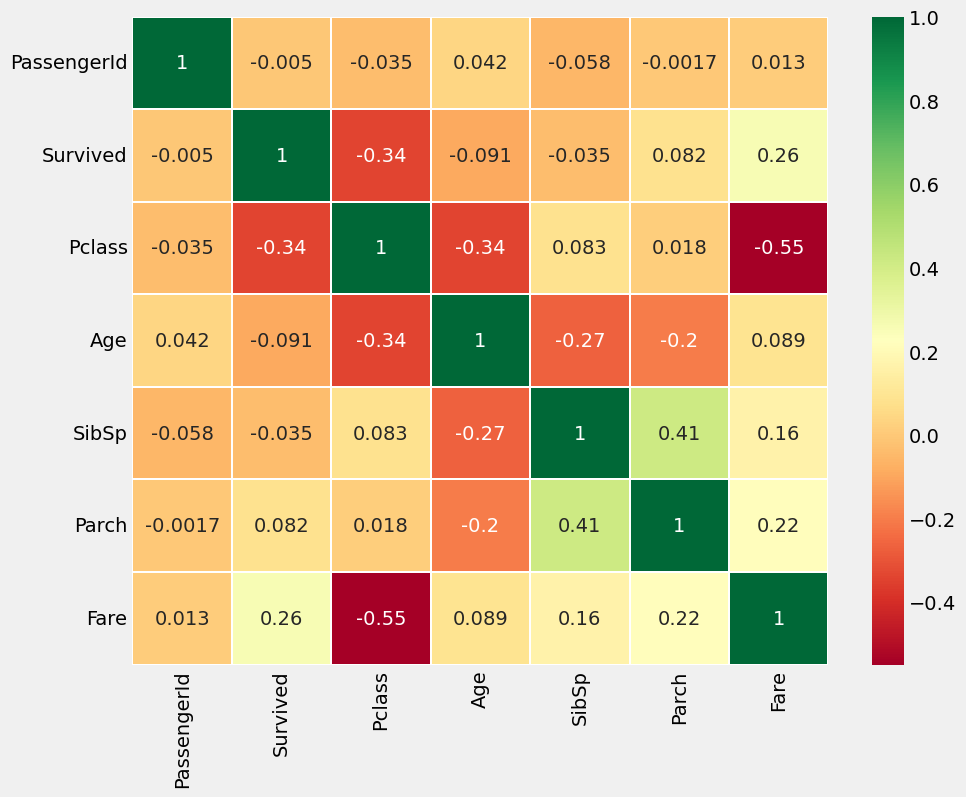

In [35]:
# 수치형 데이터가 있는 컬럼만 선택
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# 데이터프레임의 상관관계 행렬을 히트맵으로 시각화
sns.heatmap(numerical_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* 히트맵에 대한 설명
> 가장 먼저 주목해야 할 것은 알파벳이나 문자열 간에 상관관계가 없음이 분명하므로 숫자 특징만 비교한다는 것입니다. 줄거리를 이해하기 전에 정확하게 상관관계가 무엇인지 알아보겠습니다.  
양의 상관관계: 특징 A의 증가가 특징 B의 증가로 이어진다면, 그들은 양의 상관관계입니다. 값 1은 완벽한 양의 상관관계를 의미합니다.  
음의 상관관계: 특징 A의 증가가 특징 B의 감소로 이어진다면, 그들은 음의 상관관계입니다. 값 -1은 완전한 음의 상관관계를 의미합니다.  
이제 두 특징들은 매우 또는 완벽하게 상관관계가 있으므로 한 특징의 증가는 다른 특징의 증가로 이어진다고 합시다. 이것은 두 특징 모두 매우 유사한 정보를 포함하고 있고 정보의 변화가 거의 또는 전혀 없다는 것을 의미합니다. 두 특징 모두 거의 동일한 정보를 포함하고 있기 때문에 이것은 MultiColinearity라고 알려져 있습니다.  
그래서 당신은 우리가 그들 중 하나가 중복되므로 두 가지를 모두 사용해야 한다고 생각합니까? 모델을 만들거나 훈련하는 동안, 우리는 훈련 시간과 많은 이점을 줄이기 때문에 중복 기능을 제거하려고 노력해야 합니다.  
이제 위의 히트맵에서 우리는 특징들이 별로 상관관계가 없다는 것을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parchi.e 0.41 사이입니다. 따라서 우리는 모든 특징을 계속 수행할 수 있습니다.  
[[출처] 캐글 EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

---
### 데이터 전처리
모델을 학습 시키기에 앞서, 우리가 스테이크를 먹을 때 먹기 좋은 크기로 썰어 먹듯이, 학습을 하기 좋은 형태로 데이터를 가공을 해야 한다.  
지금까지 우리가 분석한 데이터에는 분명 학습할 필요가 없는 데이터 혹은 중복 데이터가 있을 것이며 이러한 데이터를 제거하는 작업을 해야 한다.  
또한, 특정 컬럼의 데이터를 추출하여 새로운 컬럼을 생성하는 작업이 있을 수도 있다.(위에서 먼저 작업했던 이름 데이터로 이니셜 데이터를 생성한 것을 예로 들 수 있다.)

#### 나이 묶기
* 특정 범주로 나이를 묶는다.

In [36]:
# 0~16세는 0, 17~32세는 1, 33~48세는 2, 49~64세는 3, 65~세는 4로 범주화
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
# 나이 범주 별 개수 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


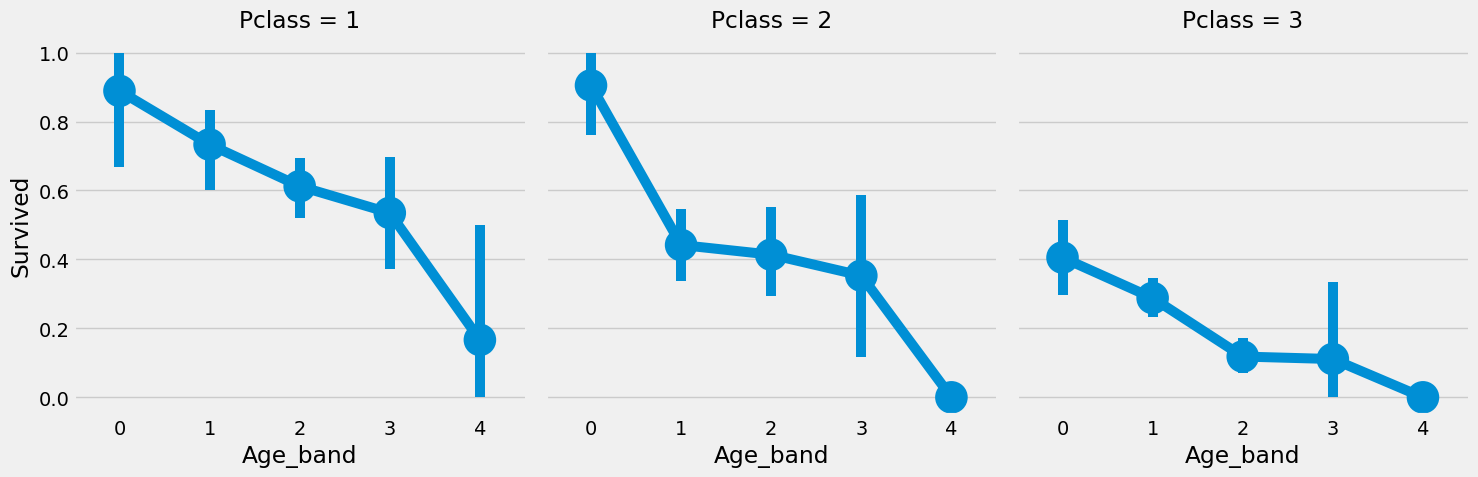

In [38]:
# 탑승 등급 별 나이 범주에 대한 생존율 그래프 그리기
sns.catplot(x='Age_band',y='Survived',data=data,kind='point',col='Pclass')
plt.show()

* 모든 등급에서 공통적으로 나이 범주가 증가할수록 생존율이 떨어지고 있는 것을 확인할 수 있다.

#### 가족 구성원 수와 나홀로 탑승
* family_size와 alone이라는 새로운 피처를 생성하고 그 데이터를 분석한다.
* 이 피처는 동승 부모/자녀 수와 동승 형제/배우자 수의 합이다.
* 이렇게 생성한 피처로 개인의 생존율이 동승 가족 구성원 수와 관련이 있는지 분석할 수 있다.

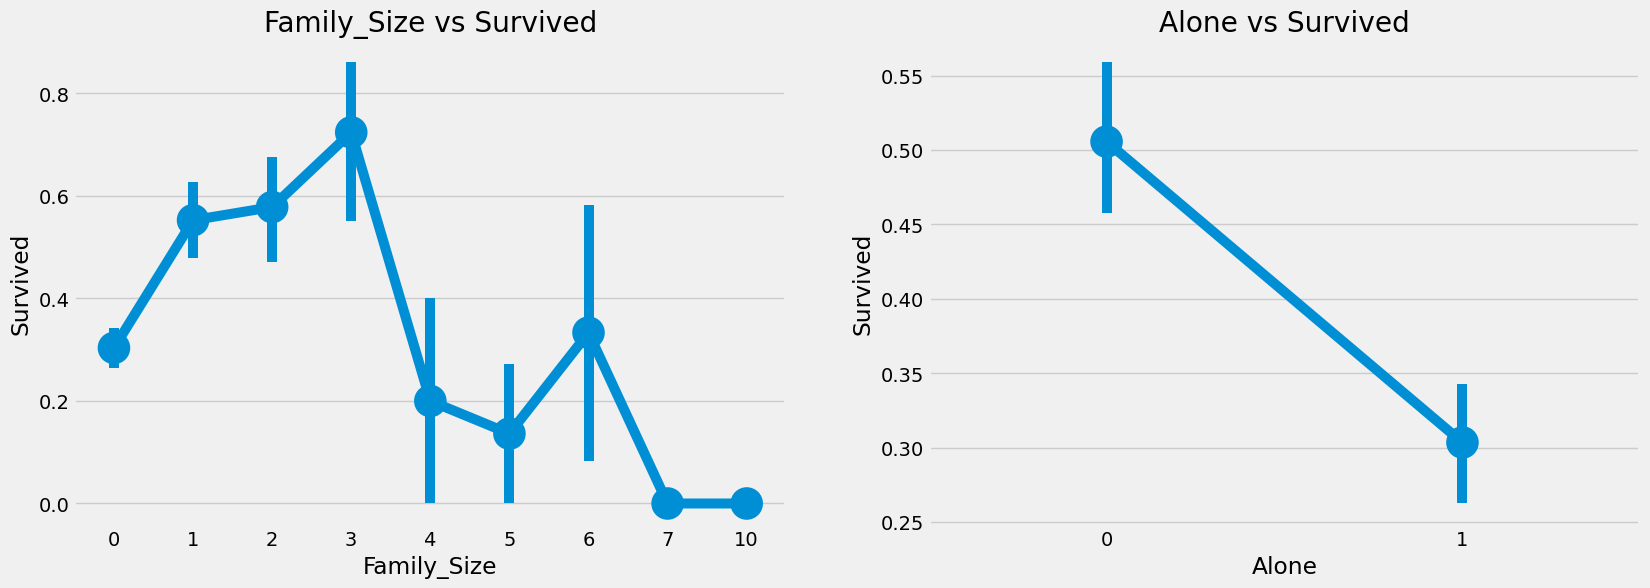

In [39]:
# 동승 가족 구성원 수에 대한 값을 가지고 있는 컬럼 생성
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
# 나홀로 탑승 여부를 알 수 있는 컬럼 생성
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
# 동승 가족 수 대비 생존율 그래프 그리기
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
# 나홀로 탑승 여부에 따른 생존율 그래프 그리기
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

* 혼자 탑승을 한 승객과 동승 가족 수가 4명 보다 많은 승객의 생존율이 매우 낮다는 것을 알 수 있다.

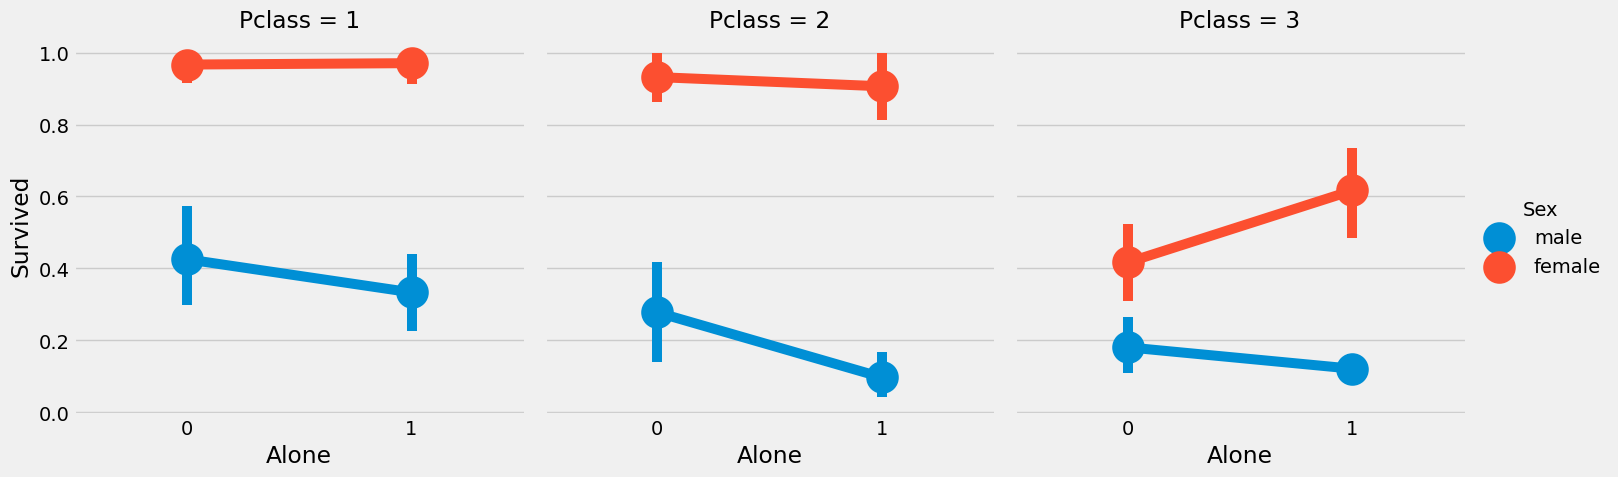

In [40]:
# 탑승 등급과 성별 별 혼자 탑승한 승객의 생존률 그래프 그리기
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',kind='point',col='Pclass')
plt.show()

#### 요금 범위
* 요금 또한 연속적인 피처이므로, 이 데이터를 이산적 피처로 변환할 필요가 있다.

In [41]:
# 요금 데이터를 이산적 데이터로 변환 후 확인
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


* 위의 결과와 같이 요금 범위가 증가함에 따라 생존율이 증가한다는 것을 알 수 있다.
* 위의 값을 그대로 사용하지 않고 나이 묶음과 같이 싱글톤 값으로 변환을 해야 한다.

In [42]:
# 나이 묶음과 같이 특정 범위로 묶음 생성
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

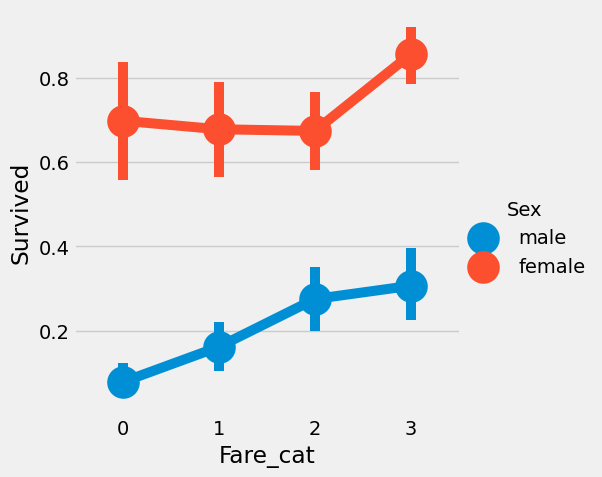

In [43]:
# 요금 범주에 따른 생존율 그래프 그리기
sns.catplot(x='Fare_cat',y='Survived',data=data,kind='point',hue='Sex')
plt.show()

* 요금 범주가 커질 수록 생존율이 높아지는 것을 확인할 수 있다.

#### 문자형 데이터를 숫자형으로 인코딩
* 머신러닝을 하는 모델은 문자형을 읽을 수가 없기 때문에 성별, 기항지 등의 문자열 피처들을 숫자형 데이터로 변환을 해야 한다.

In [44]:
# 문자형 데이터를 숫자로 치환
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### 불필요한 컬럼 제거
* 학습을 진행함에 있어 도움이 되지 않을 컬럼을 제거하는 작업이 필요하다.
    * 이름: 생존율이 이름의 영향을 받지 않는다.
    * 나이: 나이 묶음 컬럼을 생성했기에 제거하도록 한다.
    * 티켓: 생존율이 티켓의 영향을 받지 않는다.
    * 요금: 가격 묶음 컬럼을 생성했기에 제거하도록 한다.
    * 객실번호: 많은 결측치와 많은 승객들이 여러 개의 객실을 가지고 있기 때문에 쓸모없는 컬럼이다.
    * 요금 범주: 가격 묶음 컬럼을 생성했기에 제거하도록 한다.
    * 승객 ID: 이름과 같은 이유로 제거하도록 한다.

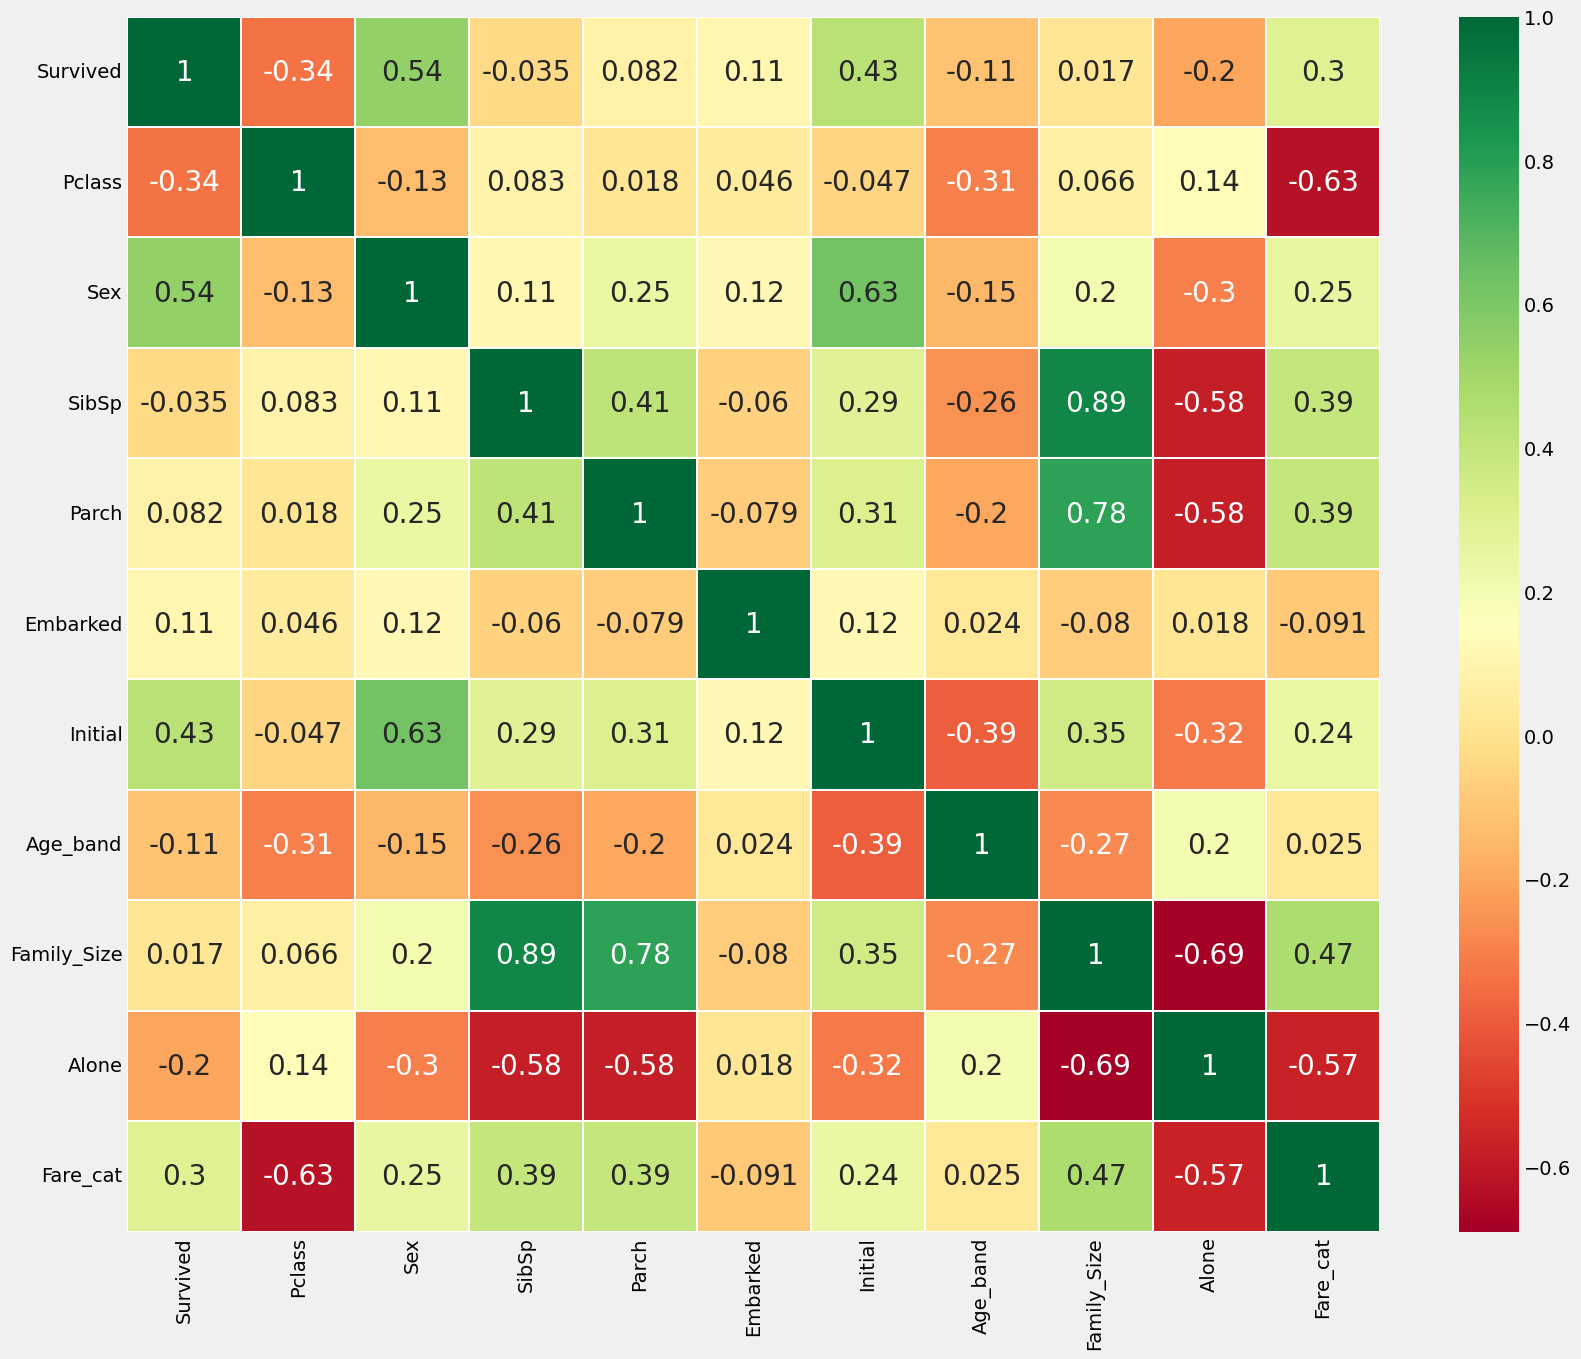

In [45]:
# 위에 설명한 컬럼 제거
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
# 갱신된 데이터프레임으로 히트맵 생성
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* 위의 히트맵에서 양의 관계가 있는 피처들을 확인할 수 있다.
* 그 중 일부는 SibSp와 Family_size이고, 일부는 Alone과 Family_size와 같은 음의 피처들이다.

### 모델 학습 및 예측
우리는 EDA 과정에서 몇 가지 insights을 얻었다. 하지만 그 정보만으로는 승객이 생존할지 사망할지 정확하게 예측할 수는 없다.  
그래서 필요한 것이 머신러닝 알고리즘이다. 몇 가지 분류 알고리즘을 사용하여 승객의 생사 여부를 예측하는 학습을 진행할 것이다.  
다음은 모델을 만들기 위해 사용할 몇 가지 알고리즘이다:
1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. native Bayes
6. Decision Tree
7. Logistic Regression

In [46]:
# ML에 필요한 모든 패키지 import
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
# 학습 데이터와 검증 데이터 분리
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [48]:
# 모델 학습 및 예측 - 정확도 출력
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [49]:
# 모델 학습 및 예측 - 정확도 출력
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [50]:
# 모델 학습 및 예측 - 정확도 출력
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [51]:
# 모델 학습 및 예측 - 정확도 출력
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Neighbours(KNN)

In [52]:
# 모델 학습 및 예측 - 정확도 출력
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


이제 n_n이웃 속성의 값을 변경할 때 KNN 모델의 정확도가 바뀌며, 기본값은 5이다.  
n_n이웃의 다양한 값에 대한 정확도를 확인해본다.

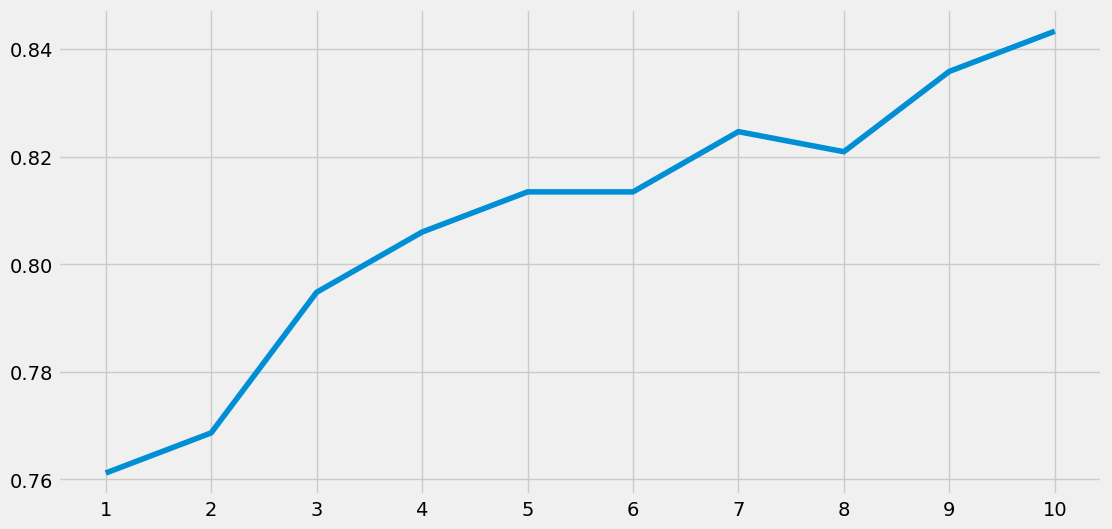

Accuracies for different values of n are: [0.7611940298507462, 0.7686567164179104, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8134328358208955, 0.8246268656716418, 0.8208955223880597, 0.835820895522388, 0.8432835820895522] with the max value as  0.8432835820895522
The optimal value of n_neighbors is: 10


In [53]:
# 반복문을 통해 n_n 이웃 속성 값을 변경하며 그 결과를 그래프로 그리기
a_index = list(range(1, 11))
accuracies = []

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_Y)
    accuracies.append(accuracy)

plt.plot(a_index, accuracies)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy) + 1  # Add 1 because Python uses 0-based indexing
print('Accuracies for different values of n are:', accuracies, 'with the max value as ', max_accuracy)
print('The optimal value of n_neighbors is:', max_index)


#### Gaussian Naive Bayes

In [54]:
# 모델 학습 및 예측 - 정확도 출력
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [55]:
# 모델 학습 및 예측 - 정확도 출력
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


classifier의 견고성을 결정하는 요인은 모델의 정확성만이 아니다. classifier가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트 되었으며, 90%의 정확도를 기록했다고 가정해보자.  
90%라는 수치는 classifier에 대해 매우 좋은 정확도인 것 같지만, 다른 모든 새로운 테스트 세트에 대해 90%가 된다는 것을 장담할 수 있을까?  
답은 '아니오'이다. classifier가 어떤 인스턴스를 사용하여 스스로 훈련할 것인지 결정할 수 업기 때문이다. 훈련 및 테스트 데이터가 변하면 정확도 역시 변할 것이다. 증가하거나 감소할 수 있으며, 이것을 '모델 분산'이라고 한다.  
이를 극복하고 일반화된 모델을 얻기 위해서는 '교차 검증'을 사용해야 한다.

#### Cross Validation
1. K-폴드 교차 검증은 먼저 데이터셋을 k-하위 집합으로 분할하여 작동한다.
2. 데이터셋을 (k=5)개의 부분으로 나눈다고 했을 때, 테스트를 위해 1개의 부분을 예약하고 4개의 부분에 걸쳐 알고리즘을 훈련시킨다.
3. 반복할 때마다 테스트 부분을 변경하고 다른 부분들은 알고리즘을 훈련시키는 과정을 반복한다. 그런 다음 정확도와 오류의 평균을 계산하여 알고리즘의 평균 정확도를 얻는다.
4. 알고리즘은 일부 학습 데이터에 대한 데이터셋보다 잘 맞을 수 있으며, 때로는 다른 학습 데이터셋에 대한 데이터를 과적합할 수도 있다. 따라서 교차 검증을 통해 일반화된 모델을 달성하는 것을 권장한다.

In [56]:
# k-fold 교차 검증에 필요한 모듈 import
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
# 교차 검증 분할 셋 지정
kfold = KFold(n_splits=10,shuffle=True, random_state=22) 
xyz=[]
accuracy=[]
std=[]
# 각 모델 별 교차 검증 진행 - 검증 결과를 데이터프레임으로 출력
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.812634,0.041063
Decision Tree,0.802497,0.045693
Naive Bayes,0.795843,0.054861
Random Forest,0.817104,0.048783


<Axes: >

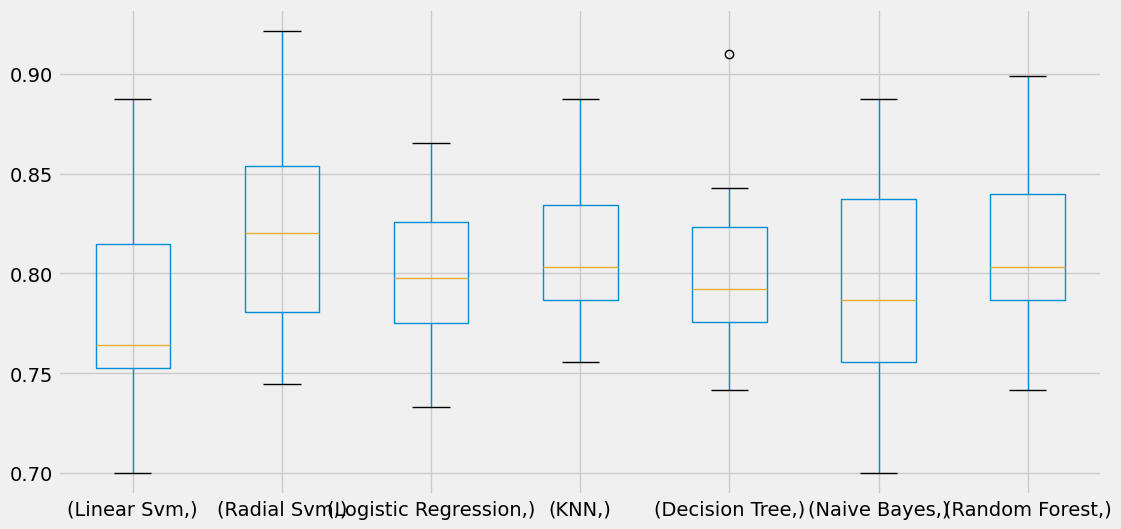

In [57]:
# 모델 별 정확도 그래프 그리기
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

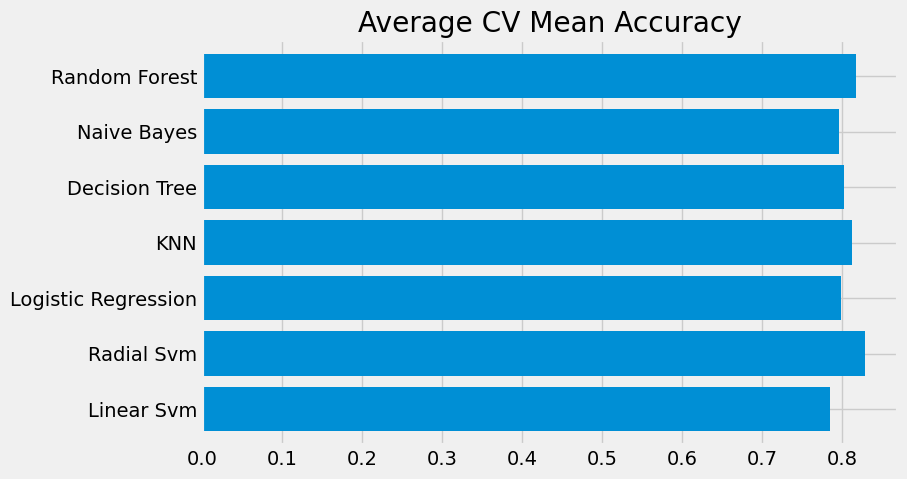

In [58]:
#
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류 정확도가 때때로 오해를 불러일으킬 수 있다. 우리는 혼동 행렬의 도움으로 요약된 결과를 얻을 수 있는데, 이 행렬은 모델이 어디에서 잘못 되었거나 모델이 어떤 클래스를 잘못 예측했는지를 보여준다.

#### Confusion Matrix
* classifier가 생성한 올바른 분류와 올바르지 않은 분류의 수를 제공한다.

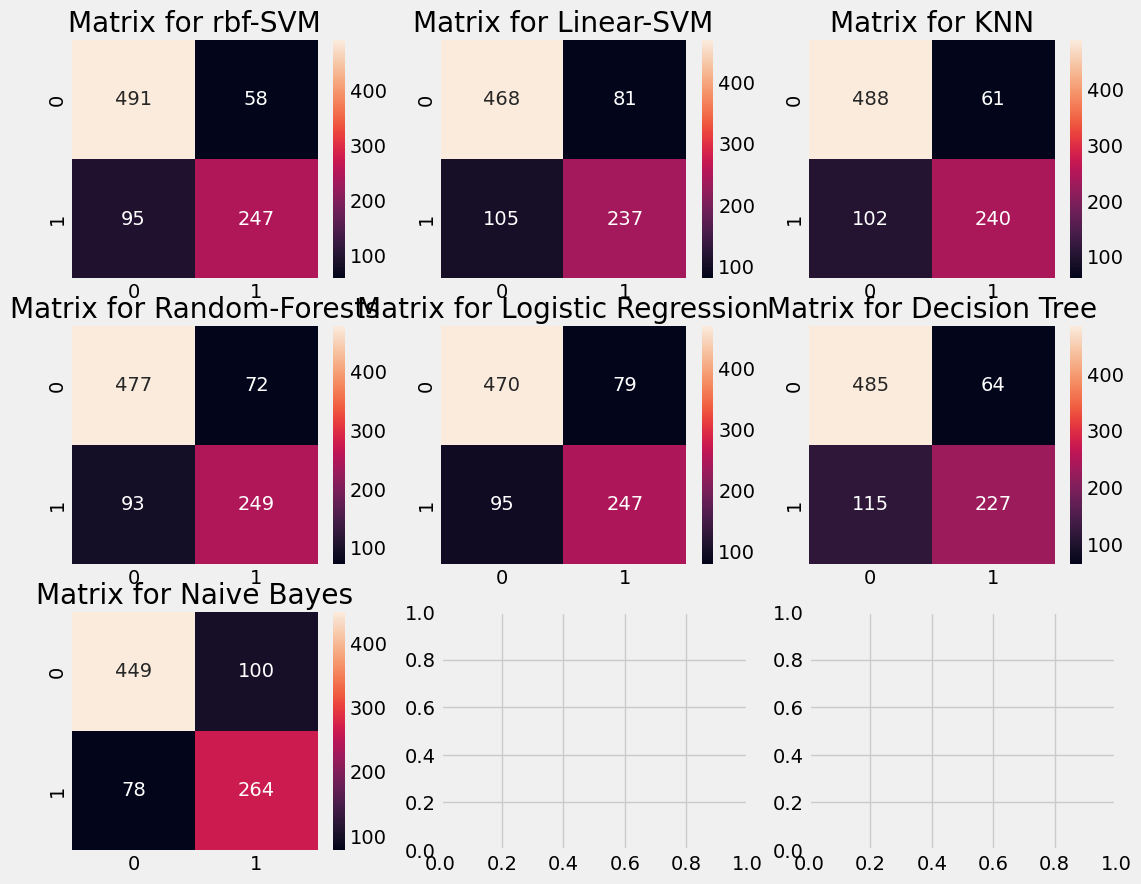

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

* 정확도만 따져봤을 때에는 거짓음성과 거짓양성의 합이 제일 적인 rbf-SVM의 성능이 제일 좋다고 할 수 있다.

머신 러닝 모델은 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있는 매개변수 값이 있다. SVM 모델의 C와 감마처럼 classifier에 따라 다른 매개변수를 '하이퍼 파라미터'라고 하는데, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 만들 수 있다. 이를 '하이퍼 파라미터 튜닝'이라고 한다.  
예시를 위해 가장 성능이 좋았던 SVM과 Random Forest classifier에 대한 하이퍼 파라미터를 조정해본다.

#### SVM

In [60]:
# GridSearchCV 모듈 import
from sklearn.model_selection import GridSearchCV

# 탐색 범위 지정
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']

# 탐색 범위 딕셔너리 생성
hyper={'kernel':kernel,'C':C,'gamma':gamma}

# 탐색 및 학습 시작 - 결과 출력
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [61]:
# 탐색 범위 지정
n_estimators=range(100,1000,100)
# 탐색 범위 딕셔너리 생성
hyper={'n_estimators':n_estimators}

# 탐색 및 학습 시작 - 결과 출력
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.82045069361622
RandomForestClassifier(n_estimators=400, random_state=0)


가장 최적의 하이퍼 파라미터 값은 Rbf-Svm에서 **약 82.82%의 정확도를 보여준 C=0.04, gamma=0.3**, RandomForest에서 **약 82.04%의 정확도를 보여준 n_estimators=400**이다.

#### Ensembling
앙상블은 모델의 정확도나 성능을 높이는 좋은 방법이다. 간단히 말해서, 다양한 단순한 모델을 결합하여 하나의 강력한 모델을 만드는 것이다.  
우리가 스마트폰을 구입하고 싶고 다양한 매개변수를 기반으로 많은 사람들에게 스마트폰에 대해 질문하고 싶다고 하자.  
그러면 우리는 모든 다른 매개변수를 분석한 후에 하나의 제품에 대해 강력한 판단을 내릴 수 있다. 이것이 모델의 안정성을 향상시키는 앙상블링이다.  
앙상블링은 다음과 같은 방법으로 수행될 수 있다:
1. Voting Classifier
2. Bagging
3. Boosting

#### Voting Classifier
다양한 기본 머신 러닝 모델의 예측을 결합하는 가장 간단한 방법이다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공한다.  
하위 모델 혹은 기본 모델은 모두 다른 유형이다.

In [71]:
# VotingClassifier 모듈 import
from sklearn.ensemble import VotingClassifier
# 각 모델의 예측 결과 결합 - 결과 출력
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.04,gamma=0.3)),
                                              ('RFor',RandomForestClassifier(n_estimators=400,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8170911360799


#### Bagging
데이터셋의 작은 파티션에 유사한 classifier를 적용한 다음 모든 예측의 평균을 취함으로써 작동한다.  
평균화로 인해 분산이 감소하며, Bagging은 Voting Classifier와 달리 유사한 classifier를 사용한다.  

<br>

*_bagged KNN_  
배깅은 분산이 높은 모델에서 가장 적합하다. 이에 대한 예로는 Decision Tree 또는 Random Forest가 있다. n_n이웃의 값이 작은 KNN을 n_n이웃의 값으로 사용할 수 있다.

In [63]:
# BaggingClassifier 모듈 import
from sklearn.ensemble import BaggingClassifier

# 하이퍼 파라미터 값을 조정하여 배깅 - 결과 출력
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


*_bagged DecisionTree_

In [64]:
# bagged 의사결정나무 파라미터 값 조정하여 배깅 - 결과 출력
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8160174781523096


#### Boosting
부스팅은 classifier의 순차적 학습을 사용하는 앙상블 기법이다. 약한 모델의 단계적 향상이며, 다음과 같이 동작한다.  
1. 전체 데이터셋에 대해 훈련을 받는다.
2. 다음 반복에서 학습자는 잘못된 사례에 대해 더 집중하거나 가중치를 부여한다.
3. 그렇게 잘못된 사례를 올바르게 예측하려고 할 것이다.
4. 이 반복 과정은 계속 되고, 정확도가 한계에 도달할 때까지 새로운 classifier가 모델에 추가된다.

*_AdaBoost(Adaptive Boosting)_  
약한 학습자 또는 추정기는 의사결정나무이지만, default base_estimator를 임의의 특정 알고리즘으로 교체가 가능하다.

In [65]:
# AdaBoostClassifier 모듈 import
from sklearn.ensemble import AdaBoostClassifier

# 하이퍼 파라미터 값을 조정하여 부스팅 - 결과 출력
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


*_Stochastic Gradient Boosting_  
약한 학습자는 의사결정나무이다.

In [66]:
# GradientBoostingClassifier 모듈 import
from sklearn.ensemble import GradientBoostingClassifier

# 하이퍼 파라미터 값을 조정하여 부스팅 - 결과 출력
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


*_XGBoost_

In [67]:
# xgboost 모듈 import
import xgboost as xg

# 하이퍼 파라미터 값을 조정하여 부스팅 - 결과 출력
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


가장 높은 정확도를 보여줬던 AdaBoost를 통해 최적의 하이퍼파라미터를 찾아본다.

<br>

*_Hyper-Parameter Tuning for AdaBoost_

In [68]:
# 조정 범위 설정
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# 설정한 범위로 딕셔너리 생성
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
#최적합 하이퍼 파라미터 탐색 - 결과 출력
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


* AdaBoost로 얻을 수 있는 최대 정확도는 n_estimators=100, learning_rate=0.1로 학습한 82.93%이다.

#### Confusion Matrix for the Best Model

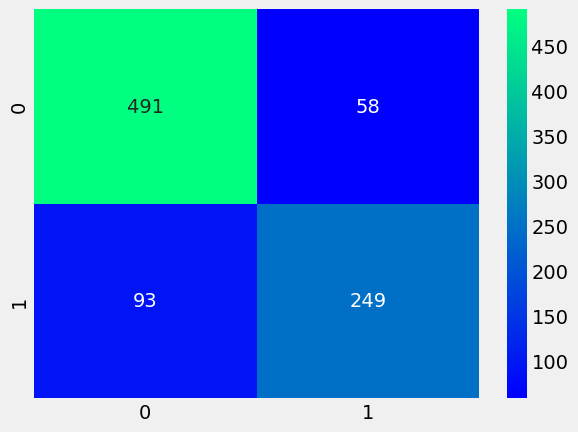

In [69]:
# 최적의 모델로 부스트
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
result=cross_val_predict(ada,X,Y,cv=10)
# 부스트 결과로 히트맵 그리기
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### 피처 중요도

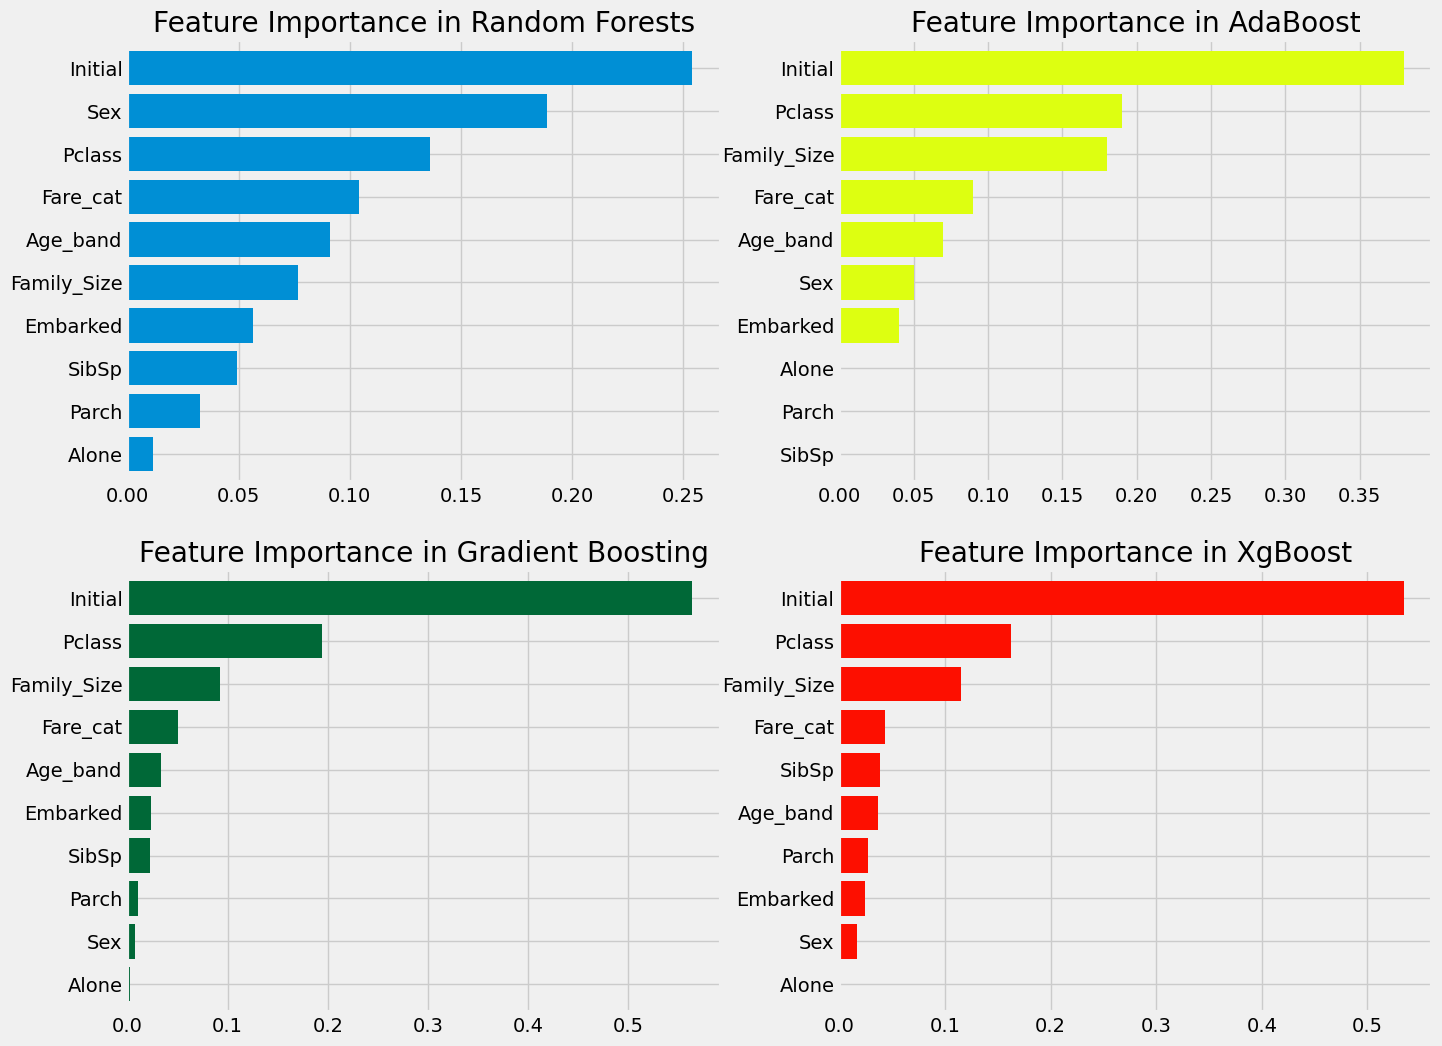

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
# 랜덤 포레스트 피처 중요도 그래프 그리기
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
# AdaBoost 피처 중요도 그래프 그리기
model=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
# GradientBoost 피처 중요도 그래프 그리기
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
# XGBoost 피처 중요도 그래프 그리기
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

* 일반적으로 중요한 피처는 이니셜, 승객 등급, 동승 가족 수, 요금 묶음이다.
* 성별 피처는 아무런 중요성도 부여하지 않는 것 같은데, 성별과 승객 등급의 결합이 매우 좋은 차별화 요소를 제공한다는 분석 결과와는 차이를 보인다.
> 성별 피처는 랜덤 포레스트에서만 중요한 것처럼 보인다.
* 하지만, 위에서 분석한 것과 같이 initial도 결국 성별을 나타내는 피처이기 때문에 성별이 가장 중요하다고 판단을 할 수 있다.
* 마찬가지로 요금 묶음과 승객 등급은 동승 가족 수와 상관 관계가 있기 때문에 결론적으로 성별과 동승 가족 수가 생존율에 있어 가장 중요한 지표라고 볼 수 있다.

---
## 회고
실제로 데이터를 분석하고 핸들링하는 방법을 따라가면서 지금까지 학습한 내용들을 다시 한 번 이해하게 되었고, 특히 주어진 데이터를 어떻게 읽고 어떤 정보를 추출해야하는지에 대해 터득할 수 있는 좋은 실습이 된 것 같다.

### KEEP:
* 내용이 길고 복잡하더라도 중간에 끊지 않고 끝까지 완료하였다.
* 복잡한 내용의 그래프도 지나치지 않고 분석하였다.
### PROBLEM:
* 마지막에 집중력이 떨어져 코드 복붙이 잦아졌다.
* 실제 캐글 분석 결과와 값이 다르다.
### TRY:
* EDA 실습을 반복 진행하여 데이터 분석 시간을 단축시켜 집중력 있게 마무리하도록 노력한다.
* 시간을 내어 코드 리뷰를 하면서 놓친 부분이 있는지 검토한다.